In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
import math
import json
import time
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.externals import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')


/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [5]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
train=pd.read_csv('/content/gdrive/MyDrive/Recommendation Sys/Movies_train.csv')
# train=pd.read_csv('/content/gdrive/MyDrive/traning and test datasets/df_electronics_train.csv')
# train=pd.read_csv('/content/gdrive/MyDrive/traning and test datasets/df_modcloth_train.csv')

train.head()



,USER_MD5,MOVIE_ID,RATING,NAME,ACTORS,DIRECTORS,DOUBAN_SCORE,DOUBAN_VOTES,GENRES,LANGUAGES,REGIONS,STORYLINE,TAGS,MovieNameWord,STORYLINEWORD
0,606cd7c6cf27a968ac60b157a1565547,1293662,4,王室的婚礼,弗雷德·阿斯泰尔|简·鲍威尔,斯坦利·多南,7.3,309,喜剧|爱情|歌舞,英语,美国,Stage stars Tom and Ellen Bowen embark to open...,美国|歌舞|歌舞片|美国电影|爱情|喜剧|1951|FredAstaire,王室|的|婚礼,Stage|stars|Tom|and|Ellen|Bowen|embark|t|o|ope...
1,2c419e64af9e62f934b63464a61ee72e,3025809,4,无法无天,汤姆·哈迪|盖·皮尔斯|希亚·拉博夫|加里·奥德曼|杰西卡·查斯坦|米娅·华希科沃斯卡|戴恩...,约翰·希尔寇特,7.3,19117,剧情|犯罪|西部,英语,美国,20世纪三十年代的美国富兰克林，Bondurant家的三兄弟Forrest（汤姆·哈迪 To...,美国|犯罪|黑帮|西部片|2012|剧情|历史|动作,无法无天,20|世纪|三十|年代|的|美国|富兰克林|Bondurant|家|的|三|兄弟|Forre...
2,39cf9c6c4e9cb0b752b3b10653371895,26340301,3,被操纵的城市,池昌旭|沈恩京|吴政世|金相浩|安在洪,朴光铉,7.4,20088,动作|犯罪,韩语,韩国,《被操纵的城市》由演员池昌旭、 沈恩敬、吴正世、金相浩、金基天、安在洪、金民教等人出演，导演...,韩国|犯罪|动作|悬疑|剧情|2017|监狱|惊悚,被|操纵|的|城市,《|被|操纵|的|城市|由|演员|池昌旭|沈恩敬|吴正世|金相浩|金基天|安在洪|金民教|等...
3,b2efd948c3449af8fc99f5409606f544,1300399,4,第一滴血3,西尔维斯特·史泰龙|理查德·克里纳|马克.德.容|柯特伍德·史密斯,彼得·麦克唐纳德,7.5,25767,动作|惊悚|冒险,英语|俄语,美国,历经无数战火与生死考验，孔武有力的豪情勇士约翰·兰博（西尔维斯特·史泰龙 Sylvester...,动作|史泰龙|美国|战争|第一滴血|美国电影|经典|1988,第一|滴|血|3,历经|无数|战火|与|生死|考验|孔武有力|的|豪情|勇士|约|翰|兰博|西尔维斯特|史泰龙...
4,7a4d62607e0d138629dfc3945f209c8f,1329286,4,公主复仇记,钟欣潼|陶红|吴彦祖|詹瑞文|黄家诺|林一峰,彭浩翔,6.8,24431,剧情,粤语|汉语普通话|四川话,中国香港,周筱兰（陶红饰）在KTV工作，与男友阿ken（吴彦祖饰）感情甚浓。一天晚上，有一个年轻女仔找...,彭浩翔|香港|香港电影|吴彦祖|钟欣桐|爱情|公主复仇记|剧情,公主|复仇|记,周筱兰|陶红饰|在|KTV|工作|与|男友|阿|ken|吴彦|祖饰|感情|甚|浓|一|天|晚...


In [7]:
test=pd.read_csv('/content/gdrive/MyDrive/Recommendation Sys/Movies_test.csv')
# test=pd.read_csv('/content/gdrive/MyDrive/traning and test datasets/df_electronics_test.csv')
# test=pd.read_csv('/content/gdrive/MyDrive/traning and test datasets/df_modcloth_train.csv')

test.head()



,USER_MD5,MOVIE_ID,RATING,NAME,ACTORS,DIRECTORS,DOUBAN_SCORE,DOUBAN_VOTES,GENRES,LANGUAGES,REGIONS,STORYLINE,TAGS,MovieNameWord,STORYLINEWORD
0,71c5f8d5f194454d4cd8b981ad4331a8,3156117,4,汉娜,西尔莎·罗南|凯特·布兰切特|艾瑞克·巴纳|奥莉维亚·威廉姆斯|米歇尔·道克瑞|迪·布拉雷·...,乔·赖特,6.1,21545,动作|悬疑|惊悚|冒险,英语|德语,美国 | 英国 | 德国,位于北极圈附近的冰原森林，生活着一对平凡却有着非凡身手的父女。父亲艾利克·海勒（Eric B...,动作|美国|2011|CateBlanchett|SaoirseRonan|美国电影|剧情|...,汉娜,位于|北极圈|附近|的|冰原|森林|生活|着|一|对|平凡|却|有着|非凡|身手|的|父女|...
1,99d8e5175b7acecf68140040ee91f2da,1298362,3,益西卓玛,丹增卓嘎|拉琼|大旺堆|仁青顿珠|巴桑|次仁多吉,谢飞,7.3,222,剧情,汉语普通话|藏语,中国大陆,暑假，达娃回拉萨看望多年不见的姥爷和姥姥，正遇到姥爷病重、去世。在看护病人和料理丧事的过程中...,西藏|谢飞|益西卓玛|中国|藏区|2000|中国电影|国产电影,益西卓玛,暑假|达娃|回|拉萨|看望|多年|不|见|的|姥爷|和|姥姥|正|遇到|姥爷|病|重|去世|...
2,f2379684c2761e63d0399f22d1363c3b,1865561,4,潜水钟与蝴蝶,马修·阿马立克|艾玛纽尔·塞尼耶|玛丽-乔西·克罗兹|安妮·康斯金尼,朱利安·施纳贝尔,7.9,33841,剧情|传记,法语,法国 | 美国,1995年12月8日，一场突如其来的灾难袭向了家庭事业双得意总编吉恩•多米尼克•鲍比（Mat...,法国|剧情|传记|2007|励志|戛纳|人生|文艺,潜水钟|与|蝴蝶,1995年|12月|8日|一|场|突如其来|的|灾难|袭向|了|家庭|事业|双得意|总编|吉...
3,035bcf06c3bdb1707c041fcc6a80e104,1300993,4,油脂,约翰·特拉沃尔塔|奥莉维亚·纽顿-约翰|斯托卡特·詹宁,兰德尔·克莱泽,7.4,4416,爱情|歌舞,英语,美国,活泼纯真的澳大利亚姑娘珊迪·奥森（奥莉维亚·纽顿-约翰 Olivia Newton-John...,美国|歌舞|青春|JohnTravolta|爱情|1978|美国电影|歌舞片,油脂,活泼|纯真|的|澳大利亚|姑娘|珊迪|奥森|奥莉维亚|纽顿|约翰|Olivia|Newton...
4,1d1d30510026f6f57f931475de0e7620,3070888,4,非常舞者,黑木美沙|桃井薰|平冈祐太|佐野光来|前田健|笕利夫|高雅拉,李志毅,7.2,5067,剧情,日语,日本 | 新加坡 | 韩国,母亲和弟弟和马的相继去世给女孩宫本昴（黑木明纱 饰）留下了永远不能消散的伤痛记忆，在她以后的...,日本电影|日本|黑木明纱|舞蹈|舞吧！昴|青春|励志|2009,非常|舞者,母亲|和|弟弟|和|马|的|相继|去世|给|女孩|宫本昴|黑木|明纱|饰|留下|了|永远|不...


In [8]:
train.shape

(176328, 15)

In [9]:
train.dtypes

USER_MD5          object
MOVIE_ID           int64
RATING             int64
NAME              object
ACTORS            object
DIRECTORS         object
DOUBAN_SCORE     float64
DOUBAN_VOTES       int64
GENRES            object
LANGUAGES         object
REGIONS           object
STORYLINE         object
TAGS              object
MovieNameWord     object
STORYLINEWORD     object
dtype: object

In [10]:
train.describe()['RATING'].T

count    176328.000000
mean          3.349394
std           1.108676
min           1.000000
25%           3.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: RATING, dtype: float64

In [11]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(train.RATING.min()))
print('Maximum rating is: %d' %(train.RATING.max()))

Minimum rating is: 1
Maximum rating is: 5


In [12]:
#Check for missing values
print('Number of missing values across columns: \n',train.isnull().sum())

Number of missing values across columns: 
 USER_MD5         0
MOVIE_ID         0
RATING           0
NAME             0
ACTORS           0
DIRECTORS        0
DOUBAN_SCORE     0
DOUBAN_VOTES     0
GENRES           0
LANGUAGES        0
REGIONS          0
STORYLINE        0
TAGS             0
MovieNameWord    0
STORYLINEWORD    0
dtype: int64


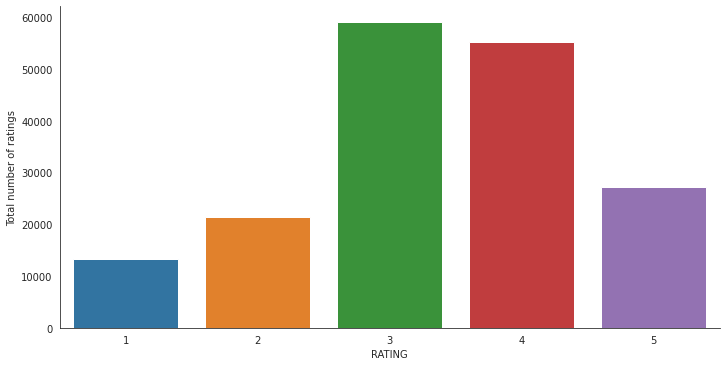

In [13]:
# Check the distribution of the rating
with sns.axes_style('white'):
    g = sns.factorplot("RATING", data=train, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

Unique Users and products

In [14]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",train.shape[0])
print("Total No of Users   :", len(np.unique(train.USER_MD5)))
print("Total No of products  :", len(np.unique(train.MOVIE_ID)))

Total data 
--------------------------------------------------

Total no of ratings : 176328
Total No of Users   : 85250
Total No of products  : 20833


In [15]:
train.columns

Index(['USER_MD5', 'MOVIE_ID', 'RATING', 'NAME', 'ACTORS', 'DIRECTORS',
       'DOUBAN_SCORE', 'DOUBAN_VOTES', 'GENRES', 'LANGUAGES', 'REGIONS',
       'STORYLINE', 'TAGS', 'MovieNameWord', 'STORYLINEWORD'],
      dtype='object')

In [16]:

#Dropping some columns

# electronics_data.drop(['timestamp'], axis=1,inplace=True)

In [17]:
#Analysis of rating given by the user 

no_of_rated_products_per_user = train.groupby(by='USER_MD5')['RATING'].count().sort_values(ascending=False)

no_of_rated_products_per_user.head()

USER_MD5
3917c1b1b030c6d249e1a798b3154c43    187
425889580eb67241e5ebcd9f9ae8a465    184
dbb091c39a912a521a0849224bb8fdb9    175
535e6f7ef1626bedd166e4dfa49bc0b4    170
f283fea0cee9e8851c092e2aa838b675    135
Name: RATING, dtype: int64

In [18]:
no_of_rated_products_per_user.describe()

count    85250.000000
mean         2.068364
std          4.134953
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        187.000000
Name: RATING, dtype: float64

In [19]:
quantiles = no_of_rated_products_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

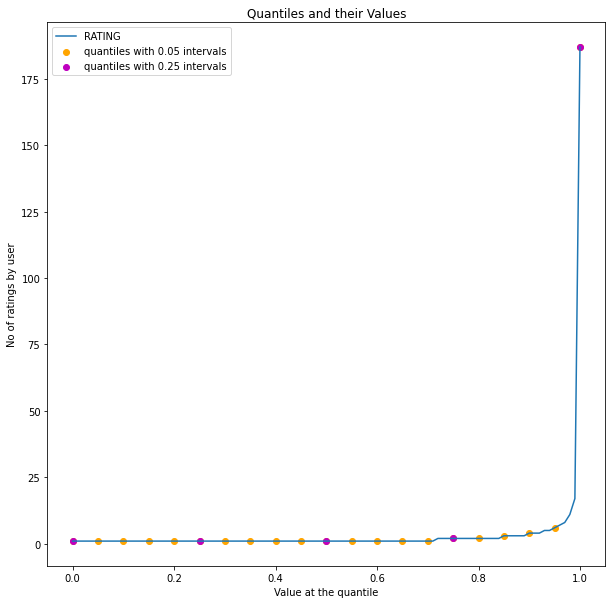

In [20]:
plt.figure(figsize=(10,10))
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

In [21]:

print('\n No of rated product more than 50 per user : {}\n'.format(sum(no_of_rated_products_per_user >= 1)) )


 No of rated product more than 50 per user : 85250



**Popularity Based Recommendation**

Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.

The problems with popularity based recommendation system is that the personalization is not available with this method i.e. even though you know the behaviour of the user you cannot recommend items accordingly.

In [22]:
#Getting the new dataframe which contains users who has given 50 or more ratings

new_df=train.groupby("USER_MD5").filter(lambda x:x['RATING'].count() >=10)

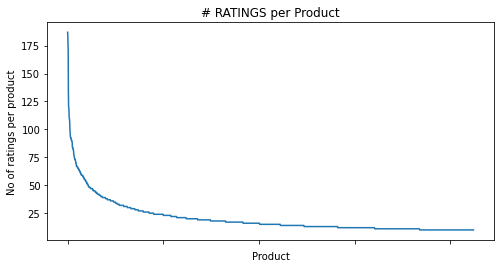

In [23]:
no_of_ratings_per_product = new_df.groupby(by='USER_MD5')['RATING'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('# RATINGS per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

In [24]:
#Average rating of the product 

new_df.groupby('USER_MD5')['RATING'].mean().head()

USER_MD5
0002296a304732a414f3cffb07bc7c3c    3.727273
001ffa9b0ceca9c023f1999f56d2c3b9    3.125000
002d2ce5ca80f1e3ccc63700e25b9658    3.047619
0048321f89df72460492b950a3f979cb    3.000000
00fcbace366238654611820ceedde2d1    3.470588
Name: RATING, dtype: float64

In [25]:
new_df.groupby('USER_MD5')['RATING'].mean().sort_values(ascending=False).head()

USER_MD5
e8ad3692b5725bc55e5ba416d77a5c41    5.000000
8640b140e8f362731905bf49258b1401    5.000000
a0d1aa358a97c99c55706595af55108c    5.000000
5dd291c628123d1a6247d5c8c17d34a4    4.888889
ade91a2c27cf3b5150563817da135f4b    4.800000
Name: RATING, dtype: float64

In [26]:
#Total no of rating for product

new_df.groupby('USER_MD5')['RATING'].count().sort_values(ascending=False).head()

USER_MD5
3917c1b1b030c6d249e1a798b3154c43    187
425889580eb67241e5ebcd9f9ae8a465    184
dbb091c39a912a521a0849224bb8fdb9    175
535e6f7ef1626bedd166e4dfa49bc0b4    170
f283fea0cee9e8851c092e2aa838b675    135
Name: RATING, dtype: int64

In [27]:
ratings_mean_count = pd.DataFrame(new_df.groupby('USER_MD5')['RATING'].mean())

In [28]:
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('USER_MD5')['RATING'].count())

In [29]:
ratings_mean_count.head()

,RATING,rating_counts
USER_MD5,,
0002296a304732a414f3cffb07bc7c3c,3.727273,11
001ffa9b0ceca9c023f1999f56d2c3b9,3.125000,24
002d2ce5ca80f1e3ccc63700e25b9658,3.047619,21
0048321f89df72460492b950a3f979cb,3.000000,32
00fcbace366238654611820ceedde2d1,3.470588,17


In [30]:
ratings_mean_count['rating_counts'].max()

187

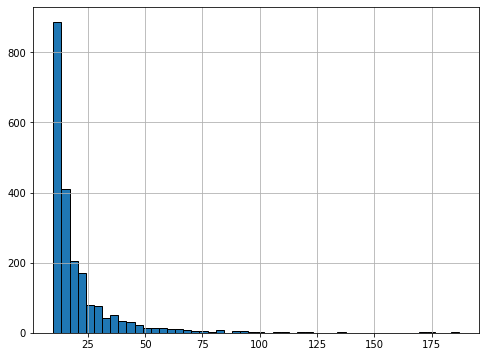

In [31]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

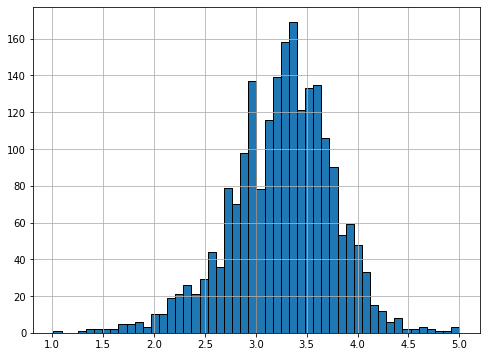

In [32]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['RATING'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

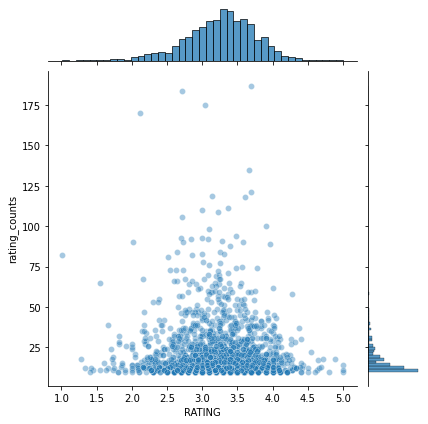

In [33]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='RATING', y='rating_counts', data=ratings_mean_count, alpha=0.4)

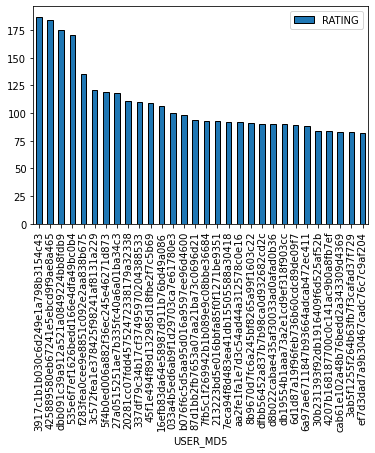

In [34]:
popular_products = pd.DataFrame(new_df.groupby('USER_MD5')['RATING'].count())
most_popular = popular_products.sort_values('RATING', ascending=False)
most_popular.head(30).plot(kind = "bar")

In [35]:
train.head()

,USER_MD5,MOVIE_ID,RATING,NAME,ACTORS,DIRECTORS,DOUBAN_SCORE,DOUBAN_VOTES,GENRES,LANGUAGES,REGIONS,STORYLINE,TAGS,MovieNameWord,STORYLINEWORD
0,606cd7c6cf27a968ac60b157a1565547,1293662,4,王室的婚礼,弗雷德·阿斯泰尔|简·鲍威尔,斯坦利·多南,7.3,309,喜剧|爱情|歌舞,英语,美国,Stage stars Tom and Ellen Bowen embark to open...,美国|歌舞|歌舞片|美国电影|爱情|喜剧|1951|FredAstaire,王室|的|婚礼,Stage|stars|Tom|and|Ellen|Bowen|embark|t|o|ope...
1,2c419e64af9e62f934b63464a61ee72e,3025809,4,无法无天,汤姆·哈迪|盖·皮尔斯|希亚·拉博夫|加里·奥德曼|杰西卡·查斯坦|米娅·华希科沃斯卡|戴恩...,约翰·希尔寇特,7.3,19117,剧情|犯罪|西部,英语,美国,20世纪三十年代的美国富兰克林，Bondurant家的三兄弟Forrest（汤姆·哈迪 To...,美国|犯罪|黑帮|西部片|2012|剧情|历史|动作,无法无天,20|世纪|三十|年代|的|美国|富兰克林|Bondurant|家|的|三|兄弟|Forre...
2,39cf9c6c4e9cb0b752b3b10653371895,26340301,3,被操纵的城市,池昌旭|沈恩京|吴政世|金相浩|安在洪,朴光铉,7.4,20088,动作|犯罪,韩语,韩国,《被操纵的城市》由演员池昌旭、 沈恩敬、吴正世、金相浩、金基天、安在洪、金民教等人出演，导演...,韩国|犯罪|动作|悬疑|剧情|2017|监狱|惊悚,被|操纵|的|城市,《|被|操纵|的|城市|由|演员|池昌旭|沈恩敬|吴正世|金相浩|金基天|安在洪|金民教|等...
3,b2efd948c3449af8fc99f5409606f544,1300399,4,第一滴血3,西尔维斯特·史泰龙|理查德·克里纳|马克.德.容|柯特伍德·史密斯,彼得·麦克唐纳德,7.5,25767,动作|惊悚|冒险,英语|俄语,美国,历经无数战火与生死考验，孔武有力的豪情勇士约翰·兰博（西尔维斯特·史泰龙 Sylvester...,动作|史泰龙|美国|战争|第一滴血|美国电影|经典|1988,第一|滴|血|3,历经|无数|战火|与|生死|考验|孔武有力|的|豪情|勇士|约|翰|兰博|西尔维斯特|史泰龙...
4,7a4d62607e0d138629dfc3945f209c8f,1329286,4,公主复仇记,钟欣潼|陶红|吴彦祖|詹瑞文|黄家诺|林一峰,彭浩翔,6.8,24431,剧情,粤语|汉语普通话|四川话,中国香港,周筱兰（陶红饰）在KTV工作，与男友阿ken（吴彦祖饰）感情甚浓。一天晚上，有一个年轻女仔找...,彭浩翔|香港|香港电影|吴彦祖|钟欣桐|爱情|公主复仇记|剧情,公主|复仇|记,周筱兰|陶红饰|在|KTV|工作|与|男友|阿|ken|吴彦|祖饰|感情|甚|浓|一|天|晚...


**Collaberative filtering (Item-Item recommedation)**

Collaborative filtering is commonly used for recommender systems. These techniques aim to fill in the missing entries of a user-item association matrix. We are going to use collaborative filtering (CF) approach. CF is based on the idea that the best recommendations come from people who have similar tastes. In other words, it uses historical item ratings of like-minded people to predict how someone would rate an item.Collaborative filtering has two sub-categories that are generally called memory based and model-based approaches.

In [37]:
!pip install surprise

     |████████████████████████████████| 11.8MB 4.7MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617582 sha256=fa07ed558e0eef5035ac5a16ca327d7d7f7bf79d3c9945263938c1cc2953a0f2
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [38]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split

In [39]:
train.columns

Index(['USER_MD5', 'MOVIE_ID', 'RATING', 'NAME', 'ACTORS', 'DIRECTORS',
       'DOUBAN_SCORE', 'DOUBAN_VOTES', 'GENRES', 'LANGUAGES', 'REGIONS',
       'STORYLINE', 'TAGS', 'MovieNameWord', 'STORYLINEWORD'],
      dtype='object')

In [40]:
train.head()

,USER_MD5,MOVIE_ID,RATING,NAME,ACTORS,DIRECTORS,DOUBAN_SCORE,DOUBAN_VOTES,GENRES,LANGUAGES,REGIONS,STORYLINE,TAGS,MovieNameWord,STORYLINEWORD
0,606cd7c6cf27a968ac60b157a1565547,1293662,4,王室的婚礼,弗雷德·阿斯泰尔|简·鲍威尔,斯坦利·多南,7.3,309,喜剧|爱情|歌舞,英语,美国,Stage stars Tom and Ellen Bowen embark to open...,美国|歌舞|歌舞片|美国电影|爱情|喜剧|1951|FredAstaire,王室|的|婚礼,Stage|stars|Tom|and|Ellen|Bowen|embark|t|o|ope...
1,2c419e64af9e62f934b63464a61ee72e,3025809,4,无法无天,汤姆·哈迪|盖·皮尔斯|希亚·拉博夫|加里·奥德曼|杰西卡·查斯坦|米娅·华希科沃斯卡|戴恩...,约翰·希尔寇特,7.3,19117,剧情|犯罪|西部,英语,美国,20世纪三十年代的美国富兰克林，Bondurant家的三兄弟Forrest（汤姆·哈迪 To...,美国|犯罪|黑帮|西部片|2012|剧情|历史|动作,无法无天,20|世纪|三十|年代|的|美国|富兰克林|Bondurant|家|的|三|兄弟|Forre...
2,39cf9c6c4e9cb0b752b3b10653371895,26340301,3,被操纵的城市,池昌旭|沈恩京|吴政世|金相浩|安在洪,朴光铉,7.4,20088,动作|犯罪,韩语,韩国,《被操纵的城市》由演员池昌旭、 沈恩敬、吴正世、金相浩、金基天、安在洪、金民教等人出演，导演...,韩国|犯罪|动作|悬疑|剧情|2017|监狱|惊悚,被|操纵|的|城市,《|被|操纵|的|城市|由|演员|池昌旭|沈恩敬|吴正世|金相浩|金基天|安在洪|金民教|等...
3,b2efd948c3449af8fc99f5409606f544,1300399,4,第一滴血3,西尔维斯特·史泰龙|理查德·克里纳|马克.德.容|柯特伍德·史密斯,彼得·麦克唐纳德,7.5,25767,动作|惊悚|冒险,英语|俄语,美国,历经无数战火与生死考验，孔武有力的豪情勇士约翰·兰博（西尔维斯特·史泰龙 Sylvester...,动作|史泰龙|美国|战争|第一滴血|美国电影|经典|1988,第一|滴|血|3,历经|无数|战火|与|生死|考验|孔武有力|的|豪情|勇士|约|翰|兰博|西尔维斯特|史泰龙...
4,7a4d62607e0d138629dfc3945f209c8f,1329286,4,公主复仇记,钟欣潼|陶红|吴彦祖|詹瑞文|黄家诺|林一峰,彭浩翔,6.8,24431,剧情,粤语|汉语普通话|四川话,中国香港,周筱兰（陶红饰）在KTV工作，与男友阿ken（吴彦祖饰）感情甚浓。一天晚上，有一个年轻女仔找...,彭浩翔|香港|香港电影|吴彦祖|钟欣桐|爱情|公主复仇记|剧情,公主|复仇|记,周筱兰|陶红饰|在|KTV|工作|与|男友|阿|ken|吴彦|祖饰|感情|甚|浓|一|天|晚...


In [41]:
#Dropping some columns

new_df.drop(['NAME'], axis=1,inplace=True)
new_df.drop(['ACTORS'], axis=1,inplace=True)
new_df.drop(['DIRECTORS'], axis=1,inplace=True)
new_df.drop(['GENRES'], axis=1,inplace=True)
new_df.drop(['LANGUAGES'], axis=1,inplace=True)
new_df.drop(['REGIONS'], axis=1,inplace=True)
new_df.drop(['STORYLINE'], axis=1,inplace=True)
new_df.drop(['TAGS'], axis=1,inplace=True)
new_df.drop(['MovieNameWord'], axis=1,inplace=True)
new_df.drop(['STORYLINEWORD'], axis=1,inplace=True)
new_df.drop(['DOUBAN_SCORE'], axis=1,inplace=True)
new_df.drop(['DOUBAN_VOTES'], axis=1,inplace=True)

In [42]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(new_df,reader)

In [45]:
data

In [48]:
#Splitting the dataset
trainset, testset = train_test_split(data, test_size=0.2,random_state=10)
trainset, validset = train_test_split(data, test_size=0.1,random_state=10)

In [49]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [50]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [51]:
# test_pred

In [52]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)
accuracy.mse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 0.6897
MSE: 0.4756


0.47562453210044753

##**Model-based collaborative filtering system**

These methods are based on machine learning and data mining techniques. The goal is to train models to be able to make predictions. For example, we could use existing user-item interactions to train a model to predict the top-5 items that a user might like the most. One advantage of these methods is that they are able to recommend a larger number of items to a larger number of users, compared to other methods like memory based approach. They have large coverage, even when working with large sparse matrices.

In [ ]:
new_df1=new_df.head(10000)
ratings_matrix = new_df1.pivot_table(values='RATING', index='USER_MD5', columns='MOVIE_ID', fill_value=0)
ratings_matrix.head()

MOVIE_ID,1291544,1291556,1291558,1291564,1291566,1291568,1291574,1291581,1291583,1291584,1291586,1291588,1291822,1291824,1291829,1291836,1291840,1291842,1291847,1291850,1291851,1291863,1291865,1291866,1291868,1291870,1291871,1291874,1291936,1291989,1291992,1292000,1292206,1292212,1292222,1292230,1292275,1292276,1292286,1292288,...,30382857,30388339,30388381,30390144,30402175,30402296,30407554,30411704,30414344,30415430,30416876,30420068,30425903,30427460,30427478,30427480,30430661,30451891,30463515,30464733,30465870,30466625,30476406,30488499,32494059,32513733,33385404,33387145,33393403,33400376,33403922,33417030,33417982,33418012,33418402,33422580,33434703,34436384,34670069,34779698
USER_MD5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0007d6911bc813d01bfec69348fe1316,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
000e951bae695323c1b98d03c2c96d15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
001a4390c53ba6b7d46f569b9c220b22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
001ffa9b0ceca9c023f1999f56d2c3b9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0022935b41c00b6760d4620405f263e7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


As expected, the utility matrix obtained above is sparce, I have filled up the unknown values wth 0.

In [ ]:
ratings_matrix.shape

(108, 5937)

In [ ]:
X = ratings_matrix.T
X.head()

USER_MD5,02092e6734ee9ef31f6998707238a80b,022357b90326c4ba8bb0cd8554d9cb77,033a4b5ed6ab9f1d29703ca7e61780e3,056fc2d256dbbba2244e0bbf45f82fff,064825fdc6cc5064dc85485245c2cc07,0730fcce0741794b022822ef57b3f47b,074829795eda340df75e32b656f60db3,076e65dfa4f649cf0772f2d503075167,0bc78f699b6c1642ad31069b66ae4091,0c2fee81b38ef7890c60b5af541e4d5e,0c679e25766f74589480fd3a5ff6a316,16efb83da64e58987d911b76bd49a086,192828c9009892dd09e02108770784a8,19578c01716365e98549b0b4c3d13b5f,20281cc07fdd45752472338179a32338,213223bd5e016bbfa85f0f1271be9351,2538d3b16cbf7f8cf8b699e107708d6c,26210ecd270513987a3f95116fa80dd2,27a0515251ae7b335fc40a6a01ba34c3,2a297e5d385fdde9152b84eb1b299b1b,2f5b519edd400f5a8f0a508c8680c402,2f79c7eefe4d99366f9118b8d0667847,30b231393f92db1916409f6d525af52b,337df79c34b17cf37495970204388533,36fbba0462fe12e424a0a70cedeb4061,378c1ec7965c344c3ee30f7c52d51df7,3917c1b1b030c6d249e1a798b3154c43,3ab5f1255f264b63fb7f3cafad37f729,3b2373ab98d4cca9af8bdad76b29377d,3c572fea1e378425f98241af8131a229,4108c033cd46bb48fe5980dc5cc0c4ea,41c1310b023183619e701b158d66e34a,4207b168187700c0c141ac9b0a8fb7ef,425889580eb67241e5ebcd9f9ae8a465,42724341c24f1dd9ea648ef0e1e29971,43e271201579540f6b4b902b5ac1ea9f,45f1e494f89d132985d18fbe2f7c5b69,48c4c2169b7a783886bff68a5b18b0a7,4d9cdb2a82e26e2fb337ebb5133242c1,4e16d633f720ccb56d149517ce9dd22a,...,a7570b84ebd662f472ad9a54215c7be9,aa2fe1fa1e7d3c54ad44a312578c0e16,ab5c8a072e1cb4f91638e6be57f3d028,b076f6c5d5aa95d016a9597ee96d4600,b3e4ac4a79a0b996d5fb65c23acf4690,b4a31eef48e4c15eae88478b0720c64f,b659f76c8512226cb0a738753a06869c,b739a84dd82bb7965dec6a55fe4af66a,b7528ab3a0ca074df89de402e794f475,bbc262693b37d851893c77ae87067959,bfb06ddbc675c01edce7ec435fb639a4,c3044b334c66a74bf6f8bd87bd75f189,c4d7cf1ff25c432daf8f78eac5bd7405,cab61e102a48b76bedd2a343309d4369,cd3820917d4a99584012f4c1e5ddefbf,ce0e6bad3e57dc03d5b30f1b66c5d381,ce39d90ff2e1c2b98f8d2a4f30a0ef63,ce9ec85e1e9dbc67527be726ed550452,cf324f0c297f8e09243bf35f62845e27,d11b3e17ea40fbfe196d740c6604f5b1,d15242f1ec9b2b718712410dada9fdbb,d2567ca313cdb395e61c1189d02c2775,d8b022cabae435af30033ad0afad0b36,db19554b1aaa73a2e1cd9ef318f903cc,dbb091c39a912a521a0849224bb8fdb9,dfb0b61c6cb6f2c1c431c1778a0bbef9,dfbb56452a837b7b98ca0d932682cd2c,e18c43d748d0f86b6541c72bb7768416,e2e558578c0687fffabb03c6b82f3086,e4e41a7765b5fe37bd096aeef97cb113,e886b13eec9253f80c0d6088983ae14e,eac73aac8aebc7bd91dacb6a3c55a69f,edecaa0405f7cd95216167d15632eac2,ef573f2fe2b49d4a3b09bd95c095a5c8,ef7c87e8d0a4090e62beae8a87331f91,ef7d3dad7a9b30467cadc76c7c9af204,f1acc7922429fc3cbeddf793a0a348ba,f283fea0cee9e8851c092e2aa838b675,f94f518879c568ec84e981e7c840125a,fd8e257e7bf34f7978033efc517ec92e
MOVIE_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1291544,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1291546,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1291553,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0
1291556,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1291558,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.shape

(5937, 108)

Unique products in subset of data

In [ ]:
X1 = X

In [ ]:
#Decomposing the Matrix
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(5937, 10)

In [ ]:
#Correlation Matrix

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(5937, 5937)

In [ ]:
X.index[5936]

34779698

Index # of product ID purchased by customer

In [ ]:
i = 34779698

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

5936

Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [ ]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(5937,)

Recommending top 25 highly correlated products in sequence

In [ ]:
Recommend = list(X.index[correlation_product_ID > 0.65])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:24]

[1292452,
 1292487,
 1292515,
 1292534,
 1292991,
 1293095,
 1293453,
 1293546,
 1293968,
 1294197,
 1294220,
 1294239,
 1294654,
 1295157,
 1295404,
 1295470,
 1295808,
 1296006,
 1296158,
 1296272,
 1296738,
 1296770,
 1297785,
 1297950]

Here are the top 10 products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website.

#**Memory-Based and Model-Based**


**Memory Based Models**

we use KNN implimentations to find out the recommentations

First: A basic collaborative filtering algorithm. (KNNBasic model)
Second: A basic collaborative filtering algorithm, taking into account the mean ratings of each user. ( benchmark model)
Third: A basic collaborative filtering algorithm, taking into account the z-score normalization of each user ( KNNWithZScore model)
Forth: A basic collaborative filtering algorithm taking into account a baseline rating. (KNNBaseline model)


**Model Based**

we use

SVD
SlopeOne

In [ ]:
from surprise import SVD,  SlopeOne
from surprise import KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore

Memory Based model

using KNNWithMeans from Surprise package, which we benchmark agains other types of KNN algorithms

In [ ]:
# Defining bsl_options and sim_options for all methods , 
# more info https://surprise.readthedocs.io/en/stable/prediction_algorithms.html#similarity-measures-configuration
bsl_options = {'method': 'als', 'n_epochs': 5, 'reg_u': 12, 'reg_i': 5 }
sim_options={'name': 'pearson_baseline', 'user_based': False}

In [ ]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering

algo_KNNWithMeans = KNNWithMeans(k=5,sim_options = sim_options , bsl_options = bsl_options)
predictions_KNNWithMeans = algo_KNNWithMeans.fit(trainset).test(testset)
rmse_KNNWithMeans = accuracy.rmse(predictions_KNNWithMeans)
mse_KNNWithMeans = accuracy.mse(predictions_KNNWithMeans)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0377
MSE: 1.0768


A basic collaborative filtering algorithm.

using KNNBasic from surprise package

In [ ]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo_KNNBasic = KNNBasic(k=5,sim_options = sim_options , bsl_options = bsl_options)
predictions_KNNBasic = algo_KNNBasic.fit(trainset).test(testset)
rmse_KNNBasic = accuracy.rmse(predictions_KNNBasic)
mse_KNNBasic = accuracy.mse(predictions_KNNBasic)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.1109
MSE: 1.2341


A basic collaborative filtering algorithm, taking into account the z-score normalization of each user.
using KNNWithZScore from surprise packag

In [ ]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo_KNNWithZScore = KNNWithZScore(k=5,sim_options = sim_options , bsl_options = bsl_options)
predictions_KNNWithZScore = algo_KNNWithZScore.fit(trainset).test(testset)
rmse_KNNWithZScore = accuracy.rmse(predictions_KNNWithZScore)
mse_KNNWithZScore = accuracy.mse(predictions_KNNWithZScore)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0377
MSE: 1.0768


A basic collaborative filtering algorithm taking into account a baseline rating.
using KNNBaseline from surprise package.

In [ ]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo_KNNBaseline = KNNBaseline(k=5,sim_options = sim_options , bsl_options = bsl_options)
predictions_KNNBaseline = algo_KNNBaseline.fit(trainset).test(testset)
rmse_KNNBaseline = accuracy.rmse(predictions_KNNBaseline)
mse_KNNBaseline = accuracy.mse(predictions_KNNBaseline)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9407
MSE: 0.8849


Model-based collaborative filtering system


These methods are based on machine learning and data mining techniques. The goal is to train models to be able to make predictions. For example, we could use existing user-item interactions to train a model to predict the top-5 items that a user might like the most. One advantage of these methods is that they are able to recommend a larger number of items to a larger number of users, compared to other methods like memory based approach. They have large coverage, even when working with large sparse matrices.

In [ ]:
# Matrix Factorization-based SVD
from surprise import SVD

algo_SVD = SVD()
predictions_SVD = algo_SVD.fit(trainset).test(testset)
rmse_SVD = accuracy.rmse(predictions_SVD)
mse_SVD = accuracy.mse(predictions_SVD)

RMSE: 0.9564
MSE: 0.9146


In [ ]:
# Matrix Factorization-based SlopeOne
from surprise import  SlopeOne

algo_SlopeOne = SlopeOne()
predictions_SlopeOne = algo_SlopeOne.fit(trainset).test(testset)
rmse_SlopeOne = accuracy.rmse(predictions_SlopeOne)
mse_SlopeOne = accuracy.mse(predictions_SlopeOne)

RMSE: 1.1533
MSE: 1.3300


Comparing RMSE for Modles

Item-based ( Memory Based) Models:

First: A basic collaborative filtering algorithm. (KNNBasic model)
Second: A basic collaborative filtering algorithm, taking into account the mean ratings of each user. (KNNWithMeans model )
Third: A basic collaborative filtering algorithm, taking into account the z-score normalization of each user ( KNNWithZScore model)
Forth: A basic collaborative filtering algorithm taking into account a baseline rating. (KNNBaseline model)

Model-Based :

SVD
SlopOne|

In [ ]:
print("Item-based Model : Test Set")
print("KNNBasic Model" , rmse_KNNBasic)
print("KNNWithMeans Model" , rmse_KNNWithMeans)
print("KNNWithZScore Model" , rmse_KNNWithZScore)
print("KNNBaseline Model" , rmse_KNNBaseline)
print("Model-based Model : Test Set")
print("SVD Model" , rmse_SVD)
print("SlopeOne Model" , rmse_SlopeOne)

Item-based Model : Test Set


NameError: ignored

In [ ]:
print("Item-based Model : Test Set")
print("KNNBasic Model" , mse_KNNBasic)
print("KNNWithMeans Model" , mse_KNNWithMeans)
print("KNNWithZScore Model" , mse_KNNWithZScore)
print("KNNBaseline Model" , mse_KNNBaseline)
print("Model-based Model : Test Set")
print("SVD Model" , mse_SVD)
print("SlopeOne Model" , mse_SlopeOne)

Item-based Model : Test Set
KNNBasic Model 1.0120700312681536
KNNWithMeans Model 0.9982343638050045
KNNWithZScore Model 0.9982405841511096
KNNBaseline Model 0.7748977808130572
Model-based Model : Test Set
SVD Model 0.790585325076033
SlopeOne Model 0.9861528775986472


# Prediction List for a Particular User in this section the list of recommendations are shown for chosen user, use different IDs to see the recommendation for each of the methods above
KNNBasic
KNNWithMeans
KNNWithZScore
KNNBaseline
SVD
SlopeOne
Difference between Item-based methods and Model-Based methods

For item based models, algo.get_neighbors(product_inner_index , k = number_of_nearest_neighbors) will produce the nearest neighbors to a product, if purchased by user then the neighbors of that product are to be recommended to the user, however for the model-based methods algo.predict(user_id, product_id) can be used to create a list of reccomended items.

In [ ]:
#Creating list of all unique users and products

all_user_ids = list(new_df['USER_MD5'].unique())

all_user_ids[:10]

all_products = list(new_df['MOVIE_ID'].unique())

all_products[:10]

[30464733,
 24736566,
 1302294,
 1302614,
 1304342,
 24751764,
 1297598,
 1298084,
 5360033,
 30141475]

In [ ]:
#the number of all unique users present in the dataset
len(all_user_ids)

108

In [ ]:
#choose the index for a particular user to generate the items recommnedation list
#choose any number between 1:552909

user_index = 11

uid = all_user_ids[user_index]

In [ ]:
#choosen user ID
print("User choosen to generate recommendation list is " + str(uid))

User choosen to generate recommendation list is ce9ec85e1e9dbc67527be726ed550452


In [ ]:
# method KNNBasic
# list of items already purchased by user choosen above

items_purchased = trainset.ur[trainset.to_inner_uid(uid)]


print("Choosen User has purchased the following items ")
for items in items_purchased[0]: 
    print(algo_KNNBasic.trainset.to_raw_iid(items))



#getting K Neareset Neighbors for first item purchased by the choosen user
KNN_Product = algo_KNNBasic.get_neighbors(items_purchased[0][0], 15)

recommendedation_lits = []
for product_iid in KNN_Product:
    if not product_iid in items_purchased[0]: #user already has purchased the item
        purchased_item = algo_KNNBasic.trainset.to_raw_iid(product_iid)
        recommendedation_lits.append(purchased_item)
print("Recommended items for user " + str(uid) + " by KNNBasic \n"  , recommendedation_lits)    

Choosen User has purchased the following items 
1464169
1475558
Recommended items for user ce9ec85e1e9dbc67527be726ed550452 by KNNBasic 
 [25938803, 4133251, 1303512, 1295192, 26578133, 1920798, 25895258, 1483988, 1308997, 2037958, 1295873, 26756119, 1949321, 1291577]


In [ ]:
# method KNNWithMeans
# list of items already purchased by user choosen above

items_purchased = trainset.ur[trainset.to_inner_uid(uid)]


print("Choosen User has purchased the following items ")
for items in items_purchased[0]: 
    print(algo_KNNWithMeans.trainset.to_raw_iid(items))



#getting K Neareset Neighbors for first item purchased by the choosen user
KNN_Product = algo_KNNWithMeans.get_neighbors(items_purchased[0][0], 15)

recommendedation_lits = []
for product_iid in KNN_Product:
    if not product_iid in items_purchased[0]: #user already has purchased the item
        purchased_item = algo_KNNWithMeans.trainset.to_raw_iid(product_iid)
        recommendedation_lits.append(purchased_item)
print("Recommended items for user " + str(uid) + " by KNNWithMeans \n"  , recommendedation_lits)    

Choosen User has purchased the following items 
1464169
1475558
Recommended items for user ce9ec85e1e9dbc67527be726ed550452 by KNNWithMeans 
 [25938803, 4133251, 1303512, 1295192, 26578133, 1920798, 25895258, 1483988, 1308997, 2037958, 1295873, 26756119, 1949321, 1291577]


In [ ]:
# method KNNWithZScore
# list of items already purchased by user choosen above

items_purchased = trainset.ur[trainset.to_inner_uid(uid)]


print("Choosen User has purchased the following items ")
for items in items_purchased[0]: 
    print(algo_KNNWithZScore.trainset.to_raw_iid(items))



#getting K Neareset Neighbors for first item purchased by the choosen user
KNN_Product = algo_KNNWithZScore.get_neighbors(items_purchased[0][0], 15)

recommendedation_lits = []
for product_iid in KNN_Product:
    if not product_iid in items_purchased[0]: #user already has purchased the item
        purchased_item = algo_KNNWithZScore.trainset.to_raw_iid(product_iid)
        recommendedation_lits.append(purchased_item)
print("Recommended items for user " + str(uid) + " by KNNWithZScore \n"  , recommendedation_lits)    

Choosen User has purchased the following items 
1464169
1475558
Recommended items for user ce9ec85e1e9dbc67527be726ed550452 by KNNWithZScore 
 [25938803, 4133251, 1303512, 1295192, 26578133, 1920798, 25895258, 1483988, 1308997, 2037958, 1295873, 26756119, 1949321, 1291577]


In [ ]:
# method KNNBaseline
# list of items already purchased by user choosen above

items_purchased = trainset.ur[trainset.to_inner_uid(uid)]


print("Choosen User has purchased the following items ")
for items in items_purchased[0]: 
    print(algo_KNNBaseline.trainset.to_raw_iid(items))



#getting K Neareset Neighbors for first item purchased by the choosen user
KNN_Product = algo_KNNBaseline.get_neighbors(items_purchased[0][0], 15)

recommendedation_lits = []
for product_iid in KNN_Product:
    if not product_iid in items_purchased[0]: #user already has purchased the item
        purchased_item = algo_KNNBaseline.trainset.to_raw_iid(product_iid)
        recommendedation_lits.append(purchased_item)
print("Recommended items for user " + str(uid) + " by KNNBaseline \n"  , recommendedation_lits)    

Choosen User has purchased the following items 
1464169
1475558
Recommended items for user ce9ec85e1e9dbc67527be726ed550452 by KNNBaseline 
 [25938803, 4133251, 1303512, 1295192, 26578133, 1920798, 25895258, 1483988, 1308997, 2037958, 1295873, 26756119, 1949321, 1291577]


Model Based Methods recommendation lists

In [ ]:
# method SVD
# list of items already purchased by user choosen above

items_purchased = trainset.ur[trainset.to_inner_uid(uid)]


print("Choosen User has purchased the following items ")
for items in items_purchased[0]: 
    print(algo_SVD.trainset.to_raw_iid(items))


Recommended_list = []

UserID = all_user_ids[user_index]

for product_id in all_products:
    pred = algo_SVD.predict(UserID,  product_id, r_ui=4, verbose=True)
    Recommended_list.append(pred)

    print("Recommended items for user " + str(uid) + " by SVD \n")

pred[:15]

Streaming output truncated to the last 5000 lines.
Recommended items for user ce9ec85e1e9dbc67527be726ed550452 by SVD 

user: ce9ec85e1e9dbc67527be726ed550452 item: 30159426   r_ui = 4.00   est = 3.17   {'was_impossible': False}
Recommended items for user ce9ec85e1e9dbc67527be726ed550452 by SVD 

user: ce9ec85e1e9dbc67527be726ed550452 item: 2351242    r_ui = 4.00   est = 3.28   {'was_impossible': False}
Recommended items for user ce9ec85e1e9dbc67527be726ed550452 by SVD 

user: ce9ec85e1e9dbc67527be726ed550452 item: 2978986    r_ui = 4.00   est = 3.06   {'was_impossible': False}
Recommended items for user ce9ec85e1e9dbc67527be726ed550452 by SVD 

user: ce9ec85e1e9dbc67527be726ed550452 item: 1308811    r_ui = 4.00   est = 2.90   {'was_impossible': False}
Recommended items for user ce9ec85e1e9dbc67527be726ed550452 by SVD 

user: ce9ec85e1e9dbc67527be726ed550452 item: 1293755    r_ui = 4.00   est = 3.53   {'was_impossible': False}
Recommended items for user ce9ec85e1e9dbc67527be726ed550452

('ce9ec85e1e9dbc67527be726ed550452',
 1304771,
 4,
 3.185722784200998,
 {'was_impossible': False})

Additional Analysis of the predictions
here in the following section, the predictions of each model is analysis

In [ ]:
#To compare each model prediction a Predictions Dataframe needs to be created, the following functions are helpers
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0

In [ ]:
#Predictions for KNNBasic

df_predictions_KNNBasic = pd.DataFrame(predictions_KNNBasic, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_predictions_KNNBasic['Iu'] = df_predictions_KNNBasic.uid.apply(get_Iu)
df_predictions_KNNBasic['Ui'] = df_predictions_KNNBasic.iid.apply(get_Ui)
df_predictions_KNNBasic['err'] = abs(df_predictions_KNNBasic.est - df_predictions_KNNBasic.rui)

In [ ]:
df_predictions_KNNBasic.head()

,uid,iid,rui,est,details,Iu,Ui,err
0,d8b022cabae435af30033ad0afad0b36,1294658,3.0,3.106582,"{'was_impossible': True, 'reason': 'Not enough...",66,1,0.106582
1,2a297e5d385fdde9152b84eb1b299b1b,1292781,3.0,3.106582,"{'was_impossible': True, 'reason': 'Not enough...",42,4,0.106582
2,bfb06ddbc675c01edce7ec435fb639a4,2042575,3.0,3.106582,"{'was_impossible': True, 'reason': 'User and/o...",48,0,0.106582
3,ef7d3dad7a9b30467cadc76c7c9af204,1810637,4.0,3.106582,"{'was_impossible': True, 'reason': 'User and/o...",51,0,0.893418
4,0bc78f699b6c1642ad31069b66ae4091,27607255,4.0,3.106582,"{'was_impossible': True, 'reason': 'Not enough...",43,1,0.893418


In [ ]:
best_predictions = df_predictions_KNNBasic.sort_values(by='err')[:10]
worst_predictions = df_predictions_KNNBasic.sort_values(by='err')[-10:]

In [ ]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
0,d8b022cabae435af30033ad0afad0b36,1294658,3.0,3.106582,"{'was_impossible': True, 'reason': 'Not enough...",66,1,0.106582
1319,4f2f9f78927516b1cacc3a2b0c05deaa,1293285,3.0,3.106582,"{'was_impossible': True, 'reason': 'Not enough...",41,1,0.106582
1317,950ee2208223543358052cad6842712c,10727845,3.0,3.106582,"{'was_impossible': True, 'reason': 'User and/o...",42,0,0.106582
1314,ef7d3dad7a9b30467cadc76c7c9af204,1293741,3.0,3.106582,"{'was_impossible': True, 'reason': 'User and/o...",51,0,0.106582
1313,535e6f7ef1626bedd166e4dfa49bc0b4,26725622,3.0,3.106582,"{'was_impossible': True, 'reason': 'Not enough...",124,1,0.106582
1312,b4a31eef48e4c15eae88478b0720c64f,7065187,3.0,3.106582,"{'was_impossible': True, 'reason': 'Not enough...",43,1,0.106582
1310,9f9c08f7533219dbf80abf4c05f1aa78,10594925,3.0,3.106582,"{'was_impossible': True, 'reason': 'User and/o...",32,0,0.106582
1307,d11b3e17ea40fbfe196d740c6604f5b1,27002761,3.0,3.106582,"{'was_impossible': True, 'reason': 'User and/o...",44,0,0.106582
1306,aa2fe1fa1e7d3c54ad44a312578c0e16,1293968,3.0,3.106582,"{'was_impossible': True, 'reason': 'User and/o...",66,0,0.106582
1320,2f5b519edd400f5a8f0a508c8680c402,1293554,3.0,3.106582,"{'was_impossible': True, 'reason': 'Not enough...",40,1,0.106582


In [ ]:
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
2214,7d82eb7680b77848c3dc8835a1a720de,26745066,1.0,3.106582,"{'was_impossible': True, 'reason': 'User and/o...",45,0,2.106582
1284,535e6f7ef1626bedd166e4dfa49bc0b4,5326543,1.0,3.106582,"{'was_impossible': True, 'reason': 'Not enough...",124,1,2.106582
1278,056fc2d256dbbba2244e0bbf45f82fff,27172892,1.0,3.106582,"{'was_impossible': True, 'reason': 'User and/o...",60,0,2.106582
1694,2a297e5d385fdde9152b84eb1b299b1b,25778488,1.0,3.106582,"{'was_impossible': True, 'reason': 'Not enough...",42,1,2.106582
1257,535e6f7ef1626bedd166e4dfa49bc0b4,6147308,1.0,3.106582,"{'was_impossible': True, 'reason': 'User and/o...",124,0,2.106582
1253,ce39d90ff2e1c2b98f8d2a4f30a0ef63,26762709,1.0,3.106582,"{'was_impossible': True, 'reason': 'User and/o...",37,0,2.106582
1252,7209b5a6c4fadd4ea09bd44dea44e9e1,6519514,1.0,3.106582,"{'was_impossible': True, 'reason': 'User and/o...",38,0,2.106582
1697,b4a31eef48e4c15eae88478b0720c64f,26266924,1.0,3.106582,"{'was_impossible': True, 'reason': 'User and/o...",43,0,2.106582
214,45f1e494f89d132985d18fbe2f7c5b69,3268216,1.0,3.106582,"{'was_impossible': True, 'reason': 'User and/o...",72,0,2.106582
2139,a4f3b72ae37fe3ba04daef96787216f3,4097178,1.0,3.106582,"{'was_impossible': True, 'reason': 'User and/o...",45,0,2.106582


In [ ]:
print("\nTotal no of ratings :",df_predictions_KNNBasic.shape[0])
print("Total No of Users   :", len(np.unique(df_predictions_KNNBasic.uid)))
print("Total No of products  :", len(np.unique(df_predictions_KNNBasic.iid)))


Total no of ratings : 2430
Total No of Users   : 108
Total No of products  : 2195


In [ ]:
#Predictions for KNNWithMeans

df_predictions_KNNWithMeans = pd.DataFrame(predictions_KNNWithMeans, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_predictions_KNNWithMeans['Iu'] = df_predictions_KNNWithMeans.uid.apply(get_Iu)
df_predictions_KNNWithMeans['Ui'] = df_predictions_KNNWithMeans.iid.apply(get_Ui)
df_predictions_KNNWithMeans['err'] = abs(df_predictions_KNNWithMeans.est - df_predictions_KNNWithMeans.rui)

In [ ]:
df_predictions_KNNWithMeans.head()

,uid,iid,rui,est,details,Iu,Ui,err
0,d8b022cabae435af30033ad0afad0b36,1294658,3.0,2.000000,"{'actual_k': 0, 'was_impossible': False}",66,1,1.000000
1,2a297e5d385fdde9152b84eb1b299b1b,1292781,3.0,4.250000,"{'actual_k': 0, 'was_impossible': False}",42,4,1.250000
2,bfb06ddbc675c01edce7ec435fb639a4,2042575,3.0,3.106582,"{'was_impossible': True, 'reason': 'User and/o...",48,0,0.106582
3,ef7d3dad7a9b30467cadc76c7c9af204,1810637,4.0,3.106582,"{'was_impossible': True, 'reason': 'User and/o...",51,0,0.893418
4,0bc78f699b6c1642ad31069b66ae4091,27607255,4.0,3.000000,"{'actual_k': 0, 'was_impossible': False}",43,1,1.000000


In [ ]:
best_predictions = df_predictions_KNNWithMeans.sort_values(by='err')[:10]
worst_predictions = df_predictions_KNNWithMeans.sort_values(by='err')[-10:]

In [ ]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
392,a15aeeb669c18867d97dad91808d5aae,1308391,3.0,3.0,"{'actual_k': 0, 'was_impossible': False}",49,1,0.0
1488,3b2373ab98d4cca9af8bdad76b29377d,24741412,4.0,4.0,"{'actual_k': 0, 'was_impossible': False}",54,1,0.0
1494,ce9ec85e1e9dbc67527be726ed550452,1302912,4.0,4.0,"{'actual_k': 0, 'was_impossible': False}",52,1,0.0
435,db19554b1aaa73a2e1cd9ef318f903cc,1867787,4.0,4.0,"{'actual_k': 0, 'was_impossible': False}",59,2,0.0
433,6501eef10b5ab4bad12037345b302103,1296499,3.0,3.0,"{'actual_k': 0, 'was_impossible': False}",46,1,0.0
1509,7fb5c1f269942b1b089e9c08bbe36684,1302474,4.0,4.0,"{'actual_k': 0, 'was_impossible': False}",64,1,0.0
428,c4d7cf1ff25c432daf8f78eac5bd7405,26589957,1.0,1.0,"{'actual_k': 0, 'was_impossible': False}",47,1,0.0
1514,26210ecd270513987a3f95116fa80dd2,1293553,4.0,4.0,"{'actual_k': 0, 'was_impossible': False}",38,1,0.0
1521,70670d08ed03304fabac43ef3078d12c,27090813,3.0,3.0,"{'actual_k': 0, 'was_impossible': False}",43,1,0.0
1533,0c679e25766f74589480fd3a5ff6a316,2121954,2.0,2.0,"{'actual_k': 0, 'was_impossible': False}",42,1,0.0


In [ ]:
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
2137,20281cc07fdd45752472338179a32338,1308026,5.0,2.0,"{'actual_k': 0, 'was_impossible': False}",85,1,3.0
1497,9204535d700967883afeb6b3f174504c,26307785,1.0,4.0,"{'actual_k': 0, 'was_impossible': False}",42,1,3.0
911,0c2fee81b38ef7890c60b5af541e4d5e,25704492,5.0,2.0,"{'actual_k': 0, 'was_impossible': False}",42,1,3.0
1592,425889580eb67241e5ebcd9f9ae8a465,3569934,4.0,1.0,"{'actual_k': 0, 'was_impossible': False}",129,1,3.0
59,6a52a495bf9f6ed333ae2adbe0e5c166,1300946,1.0,4.0,"{'actual_k': 0, 'was_impossible': False}",51,1,3.0
512,16efb83da64e58987d911b76bd49a086,1293491,1.0,4.0,"{'actual_k': 0, 'was_impossible': False}",73,1,3.0
2322,96f45e68b9aa85b831a69f7799bdffac,2336735,1.0,4.0,"{'actual_k': 0, 'was_impossible': False}",41,1,3.0
5,c4d7cf1ff25c432daf8f78eac5bd7405,26373527,1.0,4.0,"{'actual_k': 0, 'was_impossible': False}",47,1,3.0
1030,f283fea0cee9e8851c092e2aa838b675,1293076,5.0,2.0,"{'actual_k': 0, 'was_impossible': False}",95,1,3.0
1163,f283fea0cee9e8851c092e2aa838b675,1754975,5.0,1.0,"{'actual_k': 0, 'was_impossible': False}",95,1,4.0


In [ ]:
print("\nTotal no of ratings :",df_predictions_KNNWithMeans.shape[0])
print("Total No of Users   :", len(np.unique(df_predictions_KNNWithMeans.uid)))
print("Total No of products  :", len(np.unique(df_predictions_KNNWithMeans.iid)))


Total no of ratings : 2430
Total No of Users   : 108
Total No of products  : 2195


In [ ]:
#Predictions for KNNWithZScore

df_predictions_KNNWithZScore = pd.DataFrame(predictions_KNNWithZScore, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_predictions_KNNWithZScore['Iu'] = df_predictions_KNNWithZScore.uid.apply(get_Iu)
df_predictions_KNNWithZScore['Ui'] = df_predictions_KNNWithZScore.iid.apply(get_Ui)
df_predictions_KNNWithZScore['err'] = abs(df_predictions_KNNWithZScore.est - df_predictions_KNNWithZScore.rui)

In [ ]:
df_predictions_KNNWithZScore.head()

,uid,iid,rui,est,details,Iu,Ui,err
0,d8b022cabae435af30033ad0afad0b36,1294658,3.0,2.000000,"{'actual_k': 0, 'was_impossible': False}",66,1,1.000000
1,2a297e5d385fdde9152b84eb1b299b1b,1292781,3.0,4.250000,"{'actual_k': 0, 'was_impossible': False}",42,4,1.250000
2,bfb06ddbc675c01edce7ec435fb639a4,2042575,3.0,3.106582,"{'was_impossible': True, 'reason': 'User and/o...",48,0,0.106582
3,ef7d3dad7a9b30467cadc76c7c9af204,1810637,4.0,3.106582,"{'was_impossible': True, 'reason': 'User and/o...",51,0,0.893418
4,0bc78f699b6c1642ad31069b66ae4091,27607255,4.0,3.000000,"{'actual_k': 0, 'was_impossible': False}",43,1,1.000000


In [ ]:
best_predictions = df_predictions_KNNWithZScore.sort_values(by='err')[:10]
worst_predictions = df_predictions_KNNWithZScore.sort_values(by='err')[-10:]

In [ ]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
392,a15aeeb669c18867d97dad91808d5aae,1308391,3.0,3.0,"{'actual_k': 0, 'was_impossible': False}",49,1,0.0
1488,3b2373ab98d4cca9af8bdad76b29377d,24741412,4.0,4.0,"{'actual_k': 0, 'was_impossible': False}",54,1,0.0
1494,ce9ec85e1e9dbc67527be726ed550452,1302912,4.0,4.0,"{'actual_k': 0, 'was_impossible': False}",52,1,0.0
435,db19554b1aaa73a2e1cd9ef318f903cc,1867787,4.0,4.0,"{'actual_k': 0, 'was_impossible': False}",59,2,0.0
433,6501eef10b5ab4bad12037345b302103,1296499,3.0,3.0,"{'actual_k': 0, 'was_impossible': False}",46,1,0.0
1509,7fb5c1f269942b1b089e9c08bbe36684,1302474,4.0,4.0,"{'actual_k': 0, 'was_impossible': False}",64,1,0.0
428,c4d7cf1ff25c432daf8f78eac5bd7405,26589957,1.0,1.0,"{'actual_k': 0, 'was_impossible': False}",47,1,0.0
1514,26210ecd270513987a3f95116fa80dd2,1293553,4.0,4.0,"{'actual_k': 0, 'was_impossible': False}",38,1,0.0
1521,70670d08ed03304fabac43ef3078d12c,27090813,3.0,3.0,"{'actual_k': 0, 'was_impossible': False}",43,1,0.0
1533,0c679e25766f74589480fd3a5ff6a316,2121954,2.0,2.0,"{'actual_k': 0, 'was_impossible': False}",42,1,0.0


In [ ]:
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
2137,20281cc07fdd45752472338179a32338,1308026,5.0,2.0,"{'actual_k': 0, 'was_impossible': False}",85,1,3.0
1497,9204535d700967883afeb6b3f174504c,26307785,1.0,4.0,"{'actual_k': 0, 'was_impossible': False}",42,1,3.0
911,0c2fee81b38ef7890c60b5af541e4d5e,25704492,5.0,2.0,"{'actual_k': 0, 'was_impossible': False}",42,1,3.0
1592,425889580eb67241e5ebcd9f9ae8a465,3569934,4.0,1.0,"{'actual_k': 0, 'was_impossible': False}",129,1,3.0
59,6a52a495bf9f6ed333ae2adbe0e5c166,1300946,1.0,4.0,"{'actual_k': 0, 'was_impossible': False}",51,1,3.0
512,16efb83da64e58987d911b76bd49a086,1293491,1.0,4.0,"{'actual_k': 0, 'was_impossible': False}",73,1,3.0
2322,96f45e68b9aa85b831a69f7799bdffac,2336735,1.0,4.0,"{'actual_k': 0, 'was_impossible': False}",41,1,3.0
5,c4d7cf1ff25c432daf8f78eac5bd7405,26373527,1.0,4.0,"{'actual_k': 0, 'was_impossible': False}",47,1,3.0
1030,f283fea0cee9e8851c092e2aa838b675,1293076,5.0,2.0,"{'actual_k': 0, 'was_impossible': False}",95,1,3.0
1163,f283fea0cee9e8851c092e2aa838b675,1754975,5.0,1.0,"{'actual_k': 0, 'was_impossible': False}",95,1,4.0


In [ ]:
print("\nTotal no of ratings :",df_predictions_KNNWithZScore.shape[0])
print("Total No of Users   :", len(np.unique(df_predictions_KNNWithZScore.uid)))
print("Total No of products  :", len(np.unique(df_predictions_KNNWithZScore.iid)))


Total no of ratings : 2430
Total No of Users   : 108
Total No of products  : 2195


In [ ]:
#KNNBaseline
#Predictions for KNNBaseline

df_predictions_KNNBaseline = pd.DataFrame(predictions_KNNBaseline, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_predictions_KNNBaseline['Iu'] = df_predictions_KNNBaseline.uid.apply(get_Iu)
df_predictions_KNNBaseline['Ui'] = df_predictions_KNNBaseline.iid.apply(get_Ui)
df_predictions_KNNBaseline['err'] = abs(df_predictions_KNNBaseline.est - df_predictions_KNNBaseline.rui)

In [ ]:
df_predictions_KNNBaseline.head()

,uid,iid,rui,est,details,Iu,Ui,err
0,d8b022cabae435af30033ad0afad0b36,1294658,3.0,3.282696,"{'actual_k': 0, 'was_impossible': False}",66,1,0.282696
1,2a297e5d385fdde9152b84eb1b299b1b,1292781,3.0,3.436541,"{'actual_k': 0, 'was_impossible': False}",42,4,0.436541
2,bfb06ddbc675c01edce7ec435fb639a4,2042575,3.0,2.656430,{'was_impossible': False},48,0,0.343570
3,ef7d3dad7a9b30467cadc76c7c9af204,1810637,4.0,2.889831,{'was_impossible': False},51,0,1.110169
4,0bc78f699b6c1642ad31069b66ae4091,27607255,4.0,3.306894,"{'actual_k': 0, 'was_impossible': False}",43,1,0.693106


In [ ]:
best_predictions = df_predictions_KNNBaseline.sort_values(by='err')[:10]
worst_predictions = df_predictions_KNNBaseline.sort_values(by='err')[-10:]

In [ ]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
1944,e2e558578c0687fffabb03c6b82f3086,26794560,3.0,3.002549,"{'actual_k': 0, 'was_impossible': False}",46,1,0.002549
2198,aa2fe1fa1e7d3c54ad44a312578c0e16,1296972,3.0,3.004308,"{'actual_k': 0, 'was_impossible': False}",66,1,0.004308
1289,7eca94f8d483ea41db15505588a30418,4109746,3.0,2.995502,"{'actual_k': 0, 'was_impossible': False}",58,3,0.004498
2043,cf324f0c297f8e09243bf35f62845e27,3446866,3.0,3.005927,{'was_impossible': False},59,0,0.005927
322,cf324f0c297f8e09243bf35f62845e27,25851628,3.0,3.005927,{'was_impossible': False},59,0,0.005927
2340,cf324f0c297f8e09243bf35f62845e27,10833957,3.0,3.005927,{'was_impossible': False},59,0,0.005927
1288,cf324f0c297f8e09243bf35f62845e27,4281535,3.0,3.005927,{'was_impossible': False},59,0,0.005927
116,2a297e5d385fdde9152b84eb1b299b1b,1305355,3.0,3.007588,"{'actual_k': 0, 'was_impossible': False}",42,1,0.007588
297,7fb5c1f269942b1b089e9c08bbe36684,1307694,3.0,3.008140,{'was_impossible': False},64,0,0.008140
1722,7fb5c1f269942b1b089e9c08bbe36684,1302781,3.0,3.008140,{'was_impossible': False},64,0,0.008140


In [ ]:
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
1543,a4f3b72ae37fe3ba04daef96787216f3,4724560,5.0,2.503238,"{'actual_k': 0, 'was_impossible': False}",45,1,2.496762
1253,ce39d90ff2e1c2b98f8d2a4f30a0ef63,26762709,1.0,3.512068,{'was_impossible': False},37,0,2.512068
1249,7d82eb7680b77848c3dc8835a1a720de,3004244,5.0,2.425775,{'was_impossible': False},45,0,2.574225
2144,27a0515251ae7b335fc40a6a01ba34c3,26051798,1.0,3.585804,{'was_impossible': False},79,0,2.585804
826,27a0515251ae7b335fc40a6a01ba34c3,1763857,1.0,3.585804,{'was_impossible': False},79,0,2.585804
2138,27a0515251ae7b335fc40a6a01ba34c3,26923563,1.0,3.585804,{'was_impossible': False},79,0,2.585804
1439,27a0515251ae7b335fc40a6a01ba34c3,5285685,1.0,3.585804,{'was_impossible': False},79,0,2.585804
1550,27a0515251ae7b335fc40a6a01ba34c3,6984059,1.0,3.585804,{'was_impossible': False},79,0,2.585804
1841,27a0515251ae7b335fc40a6a01ba34c3,3804862,1.0,3.585804,{'was_impossible': False},79,0,2.585804
2234,6d1d87a19f96feb736b60cdc89de09f7,24532100,1.0,3.773450,{'was_impossible': False},62,0,2.773450


In [ ]:
print("\nTotal no of ratings :",df_predictions_KNNBaseline.shape[0])
print("Total No of Users   :", len(np.unique(df_predictions_KNNBaseline.uid)))
print("Total No of products  :", len(np.unique(df_predictions_KNNBaseline.iid)))


Total no of ratings : 2430
Total No of Users   : 108
Total No of products  : 2195


In [ ]:
#Predictions for SVD

df_predictions_SVD = pd.DataFrame(predictions_SVD, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_predictions_SVD['Iu'] = df_predictions_SVD.uid.apply(get_Iu)
df_predictions_SVD['Ui'] = df_predictions_SVD.iid.apply(get_Ui)
df_predictions_SVD['err'] = abs(df_predictions_SVD.est - df_predictions_SVD.rui)

df_predictions_SVD.head()

,uid,iid,rui,est,details,Iu,Ui,err
0,d8b022cabae435af30033ad0afad0b36,1294658,3.0,3.475089,{'was_impossible': False},66,1,0.475089
1,2a297e5d385fdde9152b84eb1b299b1b,1292781,3.0,3.214577,{'was_impossible': False},42,4,0.214577
2,bfb06ddbc675c01edce7ec435fb639a4,2042575,3.0,2.556160,{'was_impossible': False},48,0,0.443840
3,ef7d3dad7a9b30467cadc76c7c9af204,1810637,4.0,2.815905,{'was_impossible': False},51,0,1.184095
4,0bc78f699b6c1642ad31069b66ae4091,27607255,4.0,3.333133,{'was_impossible': False},43,1,0.666867


In [ ]:
best_predictions = df_predictions_SVD.sort_values(by='err')[:10]
worst_predictions = df_predictions_SVD.sort_values(by='err')[-10:]

In [ ]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
2206,056fc2d256dbbba2244e0bbf45f82fff,3999737,1.0,1.000000,{'was_impossible': False},60,1,0.000000
263,056fc2d256dbbba2244e0bbf45f82fff,1306006,1.0,1.000000,{'was_impossible': False},60,1,0.000000
1603,056fc2d256dbbba2244e0bbf45f82fff,1296924,1.0,1.000000,{'was_impossible': False},60,1,0.000000
113,7fb5c1f269942b1b089e9c08bbe36684,21349345,3.0,2.999708,{'was_impossible': False},64,3,0.000292
82,45f1e494f89d132985d18fbe2f7c5b69,26785580,3.0,3.002176,{'was_impossible': False},72,1,0.002176
1384,02092e6734ee9ef31f6998707238a80b,1298678,3.0,3.002223,{'was_impossible': False},45,1,0.002223
1173,e2e558578c0687fffabb03c6b82f3086,3217166,3.0,2.997640,{'was_impossible': False},46,0,0.002360
313,e2e558578c0687fffabb03c6b82f3086,3681128,3.0,2.997640,{'was_impossible': False},46,0,0.002360
1531,e2e558578c0687fffabb03c6b82f3086,1303786,3.0,2.997640,{'was_impossible': False},46,0,0.002360
1006,7209b5a6c4fadd4ea09bd44dea44e9e1,11504693,3.0,2.997101,{'was_impossible': False},38,1,0.002899


In [ ]:
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
136,d2567ca313cdb395e61c1189d02c2775,26290642,1.0,3.586220,{'was_impossible': False},43,0,2.586220
1253,ce39d90ff2e1c2b98f8d2a4f30a0ef63,26762709,1.0,3.624647,{'was_impossible': False},37,0,2.624647
1439,27a0515251ae7b335fc40a6a01ba34c3,5285685,1.0,3.633123,{'was_impossible': False},79,0,2.633123
826,27a0515251ae7b335fc40a6a01ba34c3,1763857,1.0,3.633123,{'was_impossible': False},79,0,2.633123
1841,27a0515251ae7b335fc40a6a01ba34c3,3804862,1.0,3.633123,{'was_impossible': False},79,0,2.633123
2144,27a0515251ae7b335fc40a6a01ba34c3,26051798,1.0,3.633123,{'was_impossible': False},79,0,2.633123
2138,27a0515251ae7b335fc40a6a01ba34c3,26923563,1.0,3.633123,{'was_impossible': False},79,0,2.633123
1550,27a0515251ae7b335fc40a6a01ba34c3,6984059,1.0,3.633123,{'was_impossible': False},79,0,2.633123
1249,7d82eb7680b77848c3dc8835a1a720de,3004244,5.0,2.239932,{'was_impossible': False},45,0,2.760068
2234,6d1d87a19f96feb736b60cdc89de09f7,24532100,1.0,3.889824,{'was_impossible': False},62,0,2.889824


In [ ]:
print("\nTotal no of ratings :",df_predictions_SVD.shape[0])
print("Total No of Users   :", len(np.unique(df_predictions_SVD.uid)))
print("Total No of products  :", len(np.unique(df_predictions_SVD.iid)))


Total no of ratings : 2430
Total No of Users   : 108
Total No of products  : 2195


In [ ]:
#Predictions for SlopeOne

df_predictions_SlopeOne = pd.DataFrame(predictions_SlopeOne, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_predictions_SlopeOne['Iu'] = df_predictions_SlopeOne.uid.apply(get_Iu)
df_predictions_SlopeOne['Ui'] = df_predictions_SlopeOne.iid.apply(get_Ui)
df_predictions_SlopeOne['err'] = abs(df_predictions_SlopeOne.est - df_predictions_SlopeOne.rui)

df_predictions_SlopeOne.head()

,uid,iid,rui,est,details,Iu,Ui,err
0,d8b022cabae435af30033ad0afad0b36,1294658,3.0,3.560606,{'was_impossible': False},66,1,0.560606
1,2a297e5d385fdde9152b84eb1b299b1b,1292781,3.0,3.523810,{'was_impossible': False},42,4,0.523810
2,bfb06ddbc675c01edce7ec435fb639a4,2042575,3.0,3.106582,"{'was_impossible': True, 'reason': 'User and/o...",48,0,0.106582
3,ef7d3dad7a9b30467cadc76c7c9af204,1810637,4.0,3.106582,"{'was_impossible': True, 'reason': 'User and/o...",51,0,0.893418
4,0bc78f699b6c1642ad31069b66ae4091,27607255,4.0,3.372093,{'was_impossible': False},43,1,0.627907


In [ ]:
best_predictions = df_predictions_SlopeOne.sort_values(by='err')[:10]
worst_predictions = df_predictions_SlopeOne.sort_values(by='err')[-10:]

In [ ]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
458,056fc2d256dbbba2244e0bbf45f82fff,2136357,1.0,1.0,{'was_impossible': False},60,1,0.0
1603,056fc2d256dbbba2244e0bbf45f82fff,1296924,1.0,1.0,{'was_impossible': False},60,1,0.0
1195,7fb5c1f269942b1b089e9c08bbe36684,1420289,3.0,3.0,{'was_impossible': False},64,2,0.0
1749,916d10caf1eb3309cf1f9d2dd175a800,30464733,1.0,1.0,{'was_impossible': False},40,1,0.0
164,7fb5c1f269942b1b089e9c08bbe36684,1296959,4.0,4.0,{'was_impossible': False},64,1,0.0
1509,7fb5c1f269942b1b089e9c08bbe36684,1302474,4.0,4.0,{'was_impossible': False},64,1,0.0
113,7fb5c1f269942b1b089e9c08bbe36684,21349345,3.0,3.0,{'was_impossible': False},64,3,0.0
747,7fb5c1f269942b1b089e9c08bbe36684,1966052,3.0,3.0,{'was_impossible': False},64,1,0.0
2388,9204535d700967883afeb6b3f174504c,4724373,1.0,1.0,{'was_impossible': False},42,1,0.0
759,93c418489af9d04f8ee6a61636d397b0,4819988,1.0,1.0,{'was_impossible': False},39,1,0.0


In [ ]:
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
1560,3b2373ab98d4cca9af8bdad76b29377d,6126442,1.0,3.537037,{'was_impossible': False},54,1,2.537037
193,20281cc07fdd45752472338179a32338,1292863,4.0,1.458824,{'was_impossible': False},85,2,2.541176
1116,710cc0a8155e072e7b9f54579d42c8cb,5327463,1.0,3.621622,{'was_impossible': False},37,1,2.621622
2151,3917c1b1b030c6d249e1a798b3154c43,20280082,1.0,3.697842,{'was_impossible': False},139,2,2.697842
576,6a52a495bf9f6ed333ae2adbe0e5c166,1757807,2.0,4.764706,{'was_impossible': False},51,2,2.764706
1377,fd8e257e7bf34f7978033efc517ec92e,1297294,4.0,1.232558,{'was_impossible': False},43,2,2.767442
1592,425889580eb67241e5ebcd9f9ae8a465,3569934,4.0,1.000000,{'was_impossible': False},129,1,3.000000
1322,20281cc07fdd45752472338179a32338,33413905,2.0,5.000000,{'was_impossible': False},85,1,3.000000
417,e18c43d748d0f86b6541c72bb7768416,26946508,4.0,1.000000,{'was_impossible': False},40,3,3.000000
1219,337df79c34b17cf37495970204388533,1294534,5.0,1.920000,{'was_impossible': False},75,1,3.080000


In [ ]:
print("\nTotal no of ratings :",df_predictions_SlopeOne.shape[0])
print("Total No of Users   :", len(np.unique(df_predictions_SlopeOne.uid)))
print("Total No of products  :", len(np.unique(df_predictions_SlopeOne.iid)))


Total no of ratings : 2430
Total No of Users   : 108
Total No of products  : 2195


#**Neural Collaborative Filtering for Personalized Ranking**

In [53]:
print(train.columns)
print(test.columns)

Index(['USER_MD5', 'MOVIE_ID', 'RATING', 'NAME', 'ACTORS', 'DIRECTORS',
       'DOUBAN_SCORE', 'DOUBAN_VOTES', 'GENRES', 'LANGUAGES', 'REGIONS',
       'STORYLINE', 'TAGS', 'MovieNameWord', 'STORYLINEWORD'],
      dtype='object')
Index(['USER_MD5', 'MOVIE_ID', 'RATING', 'NAME', 'ACTORS', 'DIRECTORS',
       'DOUBAN_SCORE', 'DOUBAN_VOTES', 'GENRES', 'LANGUAGES', 'REGIONS',
       'STORYLINE', 'TAGS', 'MovieNameWord', 'STORYLINEWORD'],
      dtype='object')


In [54]:
dataset=train.copy()
dataset = dataset.assign(id=(dataset['USER_MD5']).astype('category').cat.codes)
dataset

,USER_MD5,MOVIE_ID,RATING,NAME,ACTORS,DIRECTORS,DOUBAN_SCORE,DOUBAN_VOTES,GENRES,LANGUAGES,REGIONS,STORYLINE,TAGS,MovieNameWord,STORYLINEWORD,id
0,606cd7c6cf27a968ac60b157a1565547,1293662,4,王室的婚礼,弗雷德·阿斯泰尔|简·鲍威尔,斯坦利·多南,7.3,309,喜剧|爱情|歌舞,英语,美国,Stage stars Tom and Ellen Bowen embark to open...,美国|歌舞|歌舞片|美国电影|爱情|喜剧|1951|FredAstaire,王室|的|婚礼,Stage|stars|Tom|and|Ellen|Bowen|embark|t|o|ope...,31925
1,2c419e64af9e62f934b63464a61ee72e,3025809,4,无法无天,汤姆·哈迪|盖·皮尔斯|希亚·拉博夫|加里·奥德曼|杰西卡·查斯坦|米娅·华希科沃斯卡|戴恩...,约翰·希尔寇特,7.3,19117,剧情|犯罪|西部,英语,美国,20世纪三十年代的美国富兰克林，Bondurant家的三兄弟Forrest（汤姆·哈迪 To...,美国|犯罪|黑帮|西部片|2012|剧情|历史|动作,无法无天,20|世纪|三十|年代|的|美国|富兰克林|Bondurant|家|的|三|兄弟|Forre...,14512
2,39cf9c6c4e9cb0b752b3b10653371895,26340301,3,被操纵的城市,池昌旭|沈恩京|吴政世|金相浩|安在洪,朴光铉,7.4,20088,动作|犯罪,韩语,韩国,《被操纵的城市》由演员池昌旭、 沈恩敬、吴正世、金相浩、金基天、安在洪、金民教等人出演，导演...,韩国|犯罪|动作|悬疑|剧情|2017|监狱|惊悚,被|操纵|的|城市,《|被|操纵|的|城市|由|演员|池昌旭|沈恩敬|吴正世|金相浩|金基天|安在洪|金民教|等...,19109
3,b2efd948c3449af8fc99f5409606f544,1300399,4,第一滴血3,西尔维斯特·史泰龙|理查德·克里纳|马克.德.容|柯特伍德·史密斯,彼得·麦克唐纳德,7.5,25767,动作|惊悚|冒险,英语|俄语,美国,历经无数战火与生死考验，孔武有力的豪情勇士约翰·兰博（西尔维斯特·史泰龙 Sylvester...,动作|史泰龙|美国|战争|第一滴血|美国电影|经典|1988,第一|滴|血|3,历经|无数|战火|与|生死|考验|孔武有力|的|豪情|勇士|约|翰|兰博|西尔维斯特|史泰龙...,59734
4,7a4d62607e0d138629dfc3945f209c8f,1329286,4,公主复仇记,钟欣潼|陶红|吴彦祖|詹瑞文|黄家诺|林一峰,彭浩翔,6.8,24431,剧情,粤语|汉语普通话|四川话,中国香港,周筱兰（陶红饰）在KTV工作，与男友阿ken（吴彦祖饰）感情甚浓。一天晚上，有一个年轻女仔找...,彭浩翔|香港|香港电影|吴彦祖|钟欣桐|爱情|公主复仇记|剧情,公主|复仇|记,周筱兰|陶红饰|在|KTV|工作|与|男友|阿|ken|吴彦|祖饰|感情|甚|浓|一|天|晚...,40606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176323,9b4ae131c1bb94d68126d0f62cd12080,1418671,4,真假公主,英格丽·褒曼|尤·伯连纳|海伦·海丝,安纳托尔·李维克,8.0,4489,剧情|历史,英语|法语,美国,1917年，俄国革命爆发，沙皇和他的家族被捕处死。但越来越多谣传说沙皇最小的女儿——最高贵的...,英格丽·褒曼|美国|经典|爱情|美国电影|IngridBergman|1956|俄罗斯,真|假|公主,1917年|俄国|革命|爆发|沙皇|和|他|的|家族|被捕|处死|但|越|来|越|多|谣|传...,51833
176324,a77179f202fcb596d042a6febf53921e,10546728,1,从未在此,米瑞·伊诺丝|山姆·夏普德|高兰·维斯耶克|文森特·皮亚扎|妮娜·阿里安达|戴斯敏·博格斯|...,卡米拉·瑟曼,4.4,322,悬疑|惊悚,英语,美国,美国惊悚悬疑片，一些令人不安的事件使得一位拍摄陌生人的艺术家怀疑有人在监视她，真实和虚幻、犯...,悬疑|美国|2017|美国电影|剧情|电影|USA|Thriller,从未|在|此,美国|惊悚悬|疑片|一些|令|人|不|安|的|事件|使得|一|位|拍摄|陌生人|的|艺术|家...,55875
176325,7f8802bbbe888320d8c793904ca6a8e4,4099504,4,群岛,汤姆·希德勒斯顿|莉迪亚·伦纳德,乔安娜·霍格,7.1,841,剧情,英语,英国,Edward在即将前往非洲当志愿者之前与家人在小岛上相聚。他的父亲常常不能来参加家庭聚会，然...,TomHiddleston|英国|家庭|文艺|抖森|英国电影|剧情|2010,群岛,Edward|在|即将|前往|非洲|当|志愿者|之前|与|家|人|在|小|岛|上|相聚|他|...,42425
176326,2eee19766f4792c79ffd99b065f823a5,1309052,4,纳尼亚传奇1：狮子、女巫和魔衣橱,乔芝·韩莉|斯堪德·凯恩斯|威廉·莫斯里|安娜·帕波维尔|蒂尔达·斯文顿|詹姆斯·麦卡沃伊|...,安德鲁·亚当森,7.3,133219,剧情|奇幻|冒险,英语|德语,英国 | 美国,二战期间，四个小孩子随着父母来到乡下避战。这些乡村住宅古色古香，其中有一个房间里摆着一个大衣...,魔幻|纳尼亚传奇|美国|奇幻|童话|美国电影|儿童|电影,纳尼亚|传奇|1|狮子|女巫|和|魔衣橱,二战|期间|四|个|小孩子|随着|父母|来|到|乡下|避战|这些|乡村|住宅|古色古香|其中...,15407


In [55]:
dataset= dataset.drop(['NAME','ACTORS','DIRECTORS','GENRES','LANGUAGES','REGIONS','STORYLINE','TAGS','MovieNameWord','STORYLINEWORD','DOUBAN_SCORE','DOUBAN_VOTES'], axis=1)
dataset

,USER_MD5,MOVIE_ID,RATING,id
0,606cd7c6cf27a968ac60b157a1565547,1293662,4,31925
1,2c419e64af9e62f934b63464a61ee72e,3025809,4,14512
2,39cf9c6c4e9cb0b752b3b10653371895,26340301,3,19109
3,b2efd948c3449af8fc99f5409606f544,1300399,4,59734
4,7a4d62607e0d138629dfc3945f209c8f,1329286,4,40606
...,...,...,...,...
176323,9b4ae131c1bb94d68126d0f62cd12080,1418671,4,51833
176324,a77179f202fcb596d042a6febf53921e,10546728,1,55875
176325,7f8802bbbe888320d8c793904ca6a8e4,4099504,4,42425
176326,2eee19766f4792c79ffd99b065f823a5,1309052,4,15407


In [56]:
dataset.columns = [ 'USER_MD5','movie_id','rating','user_id']

In [57]:
dataset

,USER_MD5,movie_id,rating,user_id
0,606cd7c6cf27a968ac60b157a1565547,1293662,4,31925
1,2c419e64af9e62f934b63464a61ee72e,3025809,4,14512
2,39cf9c6c4e9cb0b752b3b10653371895,26340301,3,19109
3,b2efd948c3449af8fc99f5409606f544,1300399,4,59734
4,7a4d62607e0d138629dfc3945f209c8f,1329286,4,40606
...,...,...,...,...
176323,9b4ae131c1bb94d68126d0f62cd12080,1418671,4,51833
176324,a77179f202fcb596d042a6febf53921e,10546728,1,55875
176325,7f8802bbbe888320d8c793904ca6a8e4,4099504,4,42425
176326,2eee19766f4792c79ffd99b065f823a5,1309052,4,15407


In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


# Need to map movie ID to [1, num_movies]
movie_id_to_new_id = dict()
id = 1
for index, row in dataset.iterrows():
    if movie_id_to_new_id.get(row['movie_id']) is None:
        movie_id_to_new_id[row['movie_id']] = id
        dataset.at[index, 'movie_id'] = id
        id += 1
    else:
        dataset.at[index, 'movie_id'] = movie_id_to_new_id.get(row['movie_id'])

num_users = len(dataset.user_id.unique())
num_movies = len(dataset.movie_id.unique())
train, test = train_test_split(dataset, test_size=0.3)

print( 'Number of movies', num_movies)
print ('Number of users', num_users)

Number of movies 20833
Number of users 85250


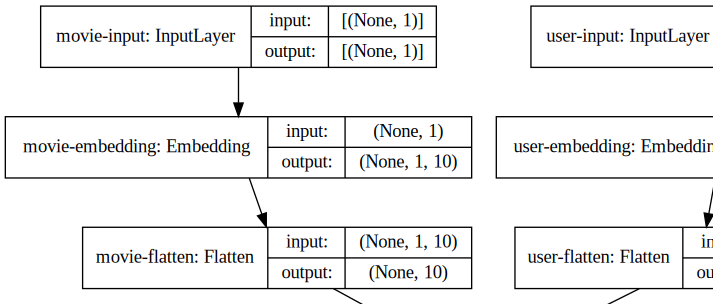

In [64]:
from keras.models import Model, Sequential
from keras.layers import Embedding, Flatten, Input, merge
from tensorflow.keras.utils import model_to_dot
from keras.callbacks import ModelCheckpoint, EarlyStopping
# from keras.utils.visualize_util import model_to_dot
from IPython.display import SVG

# Let's use a higher latent dimension.
latent_dim = 10

movie_input = Input(shape=[1],name='movie-input')
movie_embedding = Embedding(num_movies + 1, latent_dim, name='movie-embedding')(movie_input)
movie_vec = Flatten(name='movie-flatten')(movie_embedding)

user_input = Input(shape=[1],name='user-input')
user_embedding = Embedding(num_users + 1, latent_dim, name='user-embedding')(user_input)
user_vec = Flatten(name='user-flatten')(user_embedding)

# prod = merge([movie_vec, user_vec], mode='dot',name='dot-product')
from keras.layers import dot
prod = dot([movie_vec, user_vec], axes=1, normalize=False)


model = Model([user_input, movie_input], prod)
model.compile('adam', 'mean_squared_error')

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [65]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
movie-input (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
user-input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
movie-embedding (Embedding)     (None, 1, 10)        208340      movie-input[0][0]                
__________________________________________________________________________________________________
user-embedding (Embedding)      (None, 1, 10)        852510      user-input[0][0]                 
____________________________________________________________________________________________

In the model above, we are not using any activation function and there is no additional weight to layer. The model above represents a classic matrix factorization. It takes two inputs, a user ID and a movie ID. The inputs are embedded into (1, 5) vectors. The vectors are then flattened. The dot product of the flattened vectors is the predicted rating.

Epoch 1/10
3472/3472 [==============================] - 58s 16ms/step - loss: 12.4442 - val_loss: 12.3988
Epoch 2/10
3472/3472 [==============================] - 60s 17ms/step - loss: 12.3548 - val_loss: 12.3897
Epoch 3/10
3472/3472 [==============================] - 60s 17ms/step - loss: 11.8643 - val_loss: 12.3640
Epoch 4/10
3472/3472 [==============================] - 83s 24ms/step - loss: 10.9789 - val_loss: 12.3278
Epoch 5/10
3472/3472 [==============================] - 87s 25ms/step - loss: 9.7279 - val_loss: 12.2959
Epoch 6/10
3472/3472 [==============================] - 105s 30ms/step - loss: 8.1993 - val_loss: 12.2934
Epoch 7/10
3472/3472 [==============================] - 101s 29ms/step - loss: 6.6226 - val_loss: 12.3359


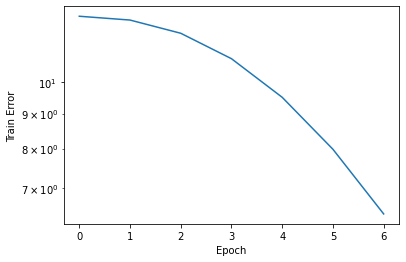

3.290670523175046

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# The EarlyStopping callback (we  seek a minimum for validation loss )
es = EarlyStopping(monitor='val_loss', mode='min')
history = model.fit([train.user_id, train.movie_id], train['rating'], epochs=10, validation_split =0.1,callbacks=[es])
pd.Series(history.history['loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")
plt.show()


y_hat = np.round(model.predict([test.user_id, test.movie_id]), decimals=2)
y_true = test.rating
mean_absolute_error(y_true, y_hat)

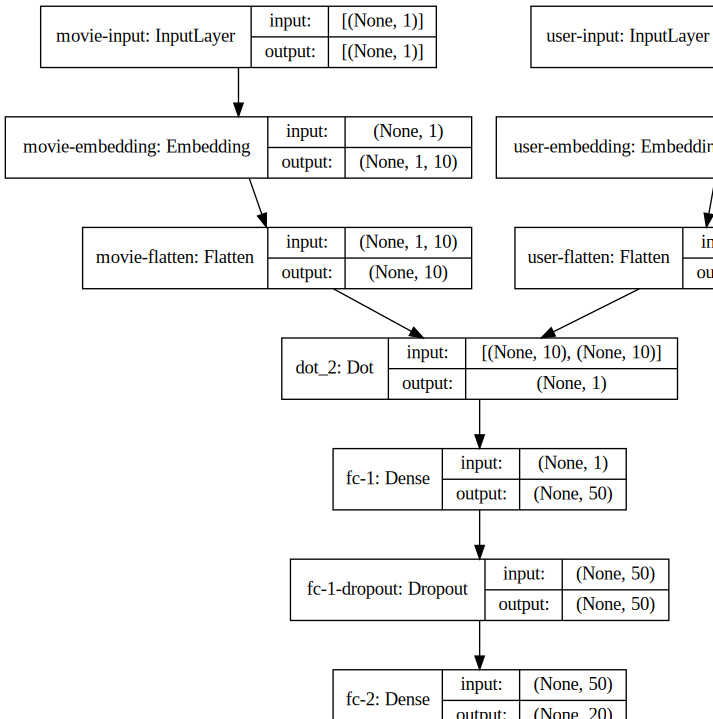

In [67]:
from keras.models import Model, Sequential
from keras.layers import Embedding, Flatten, Input, merge, Dropout, Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
# from keras.utils.visualize_util import model_to_dot
from tensorflow.keras.utils import plot_model

from IPython.display import SVG

latent_dim = 10

movie_input = Input(shape=[1],name='movie-input')
movie_embedding = Embedding(num_movies + 1, latent_dim, name='movie-embedding')(movie_input)
movie_vec = Flatten(name='movie-flatten')(movie_embedding)

user_input = Input(shape=[1],name='user-input')
user_embedding = Embedding(num_users + 1, latent_dim, name='user-embedding')(user_input)
user_vec = Flatten(name='user-flatten')(user_embedding)

# concat = merge([movie_vec, user_vec], mode='dot',name='movie-user-concat')
# prod = merge([movie_vec, user_vec], mode='dot',name='dot-product')
from keras.layers import dot
concat = dot([movie_vec, user_vec], axes=1, normalize=False)

concat_dropout = Dropout(0.2)(concat)
fc_1 = Dense(50, name='fc-1', activation='relu')(concat)
fc_1_dropout = Dropout(0.2, name='fc-1-dropout')(fc_1)
fc_2 = Dense(20, name='fc-2', activation='relu')(fc_1_dropout)
fc_2_dropout = Dropout(0.2, name='fc-2-dropout')(fc_2)
fc_3 = Dense(1, name='fc-3', activation='relu')(fc_2_dropout)


model = Model([user_input, movie_input], fc_3)
model.compile('adam', 'mean_squared_error')
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

Epoch 1/20
3472/3472 [==============================] - 90s 26ms/step - loss: 2.4821 - val_loss: 1.2551
Epoch 2/20
3472/3472 [==============================] - 102s 29ms/step - loss: 1.3268 - val_loss: 1.2906


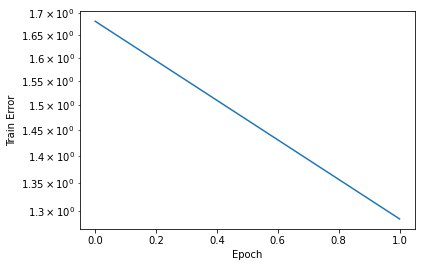

0.9123091164643752

In [68]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
es = EarlyStopping(monitor='val_loss', mode='min')
history = model.fit([train.user_id, train.movie_id], train.rating, epochs=20,validation_split =0.1,callbacks=[es])
pd.Series(history.history['loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")
plt.show()

y_hat = np.round(model.predict([test.user_id, test.movie_id]), decimals=2)
y_true = test.rating
mean_absolute_error(y_true, y_hat)

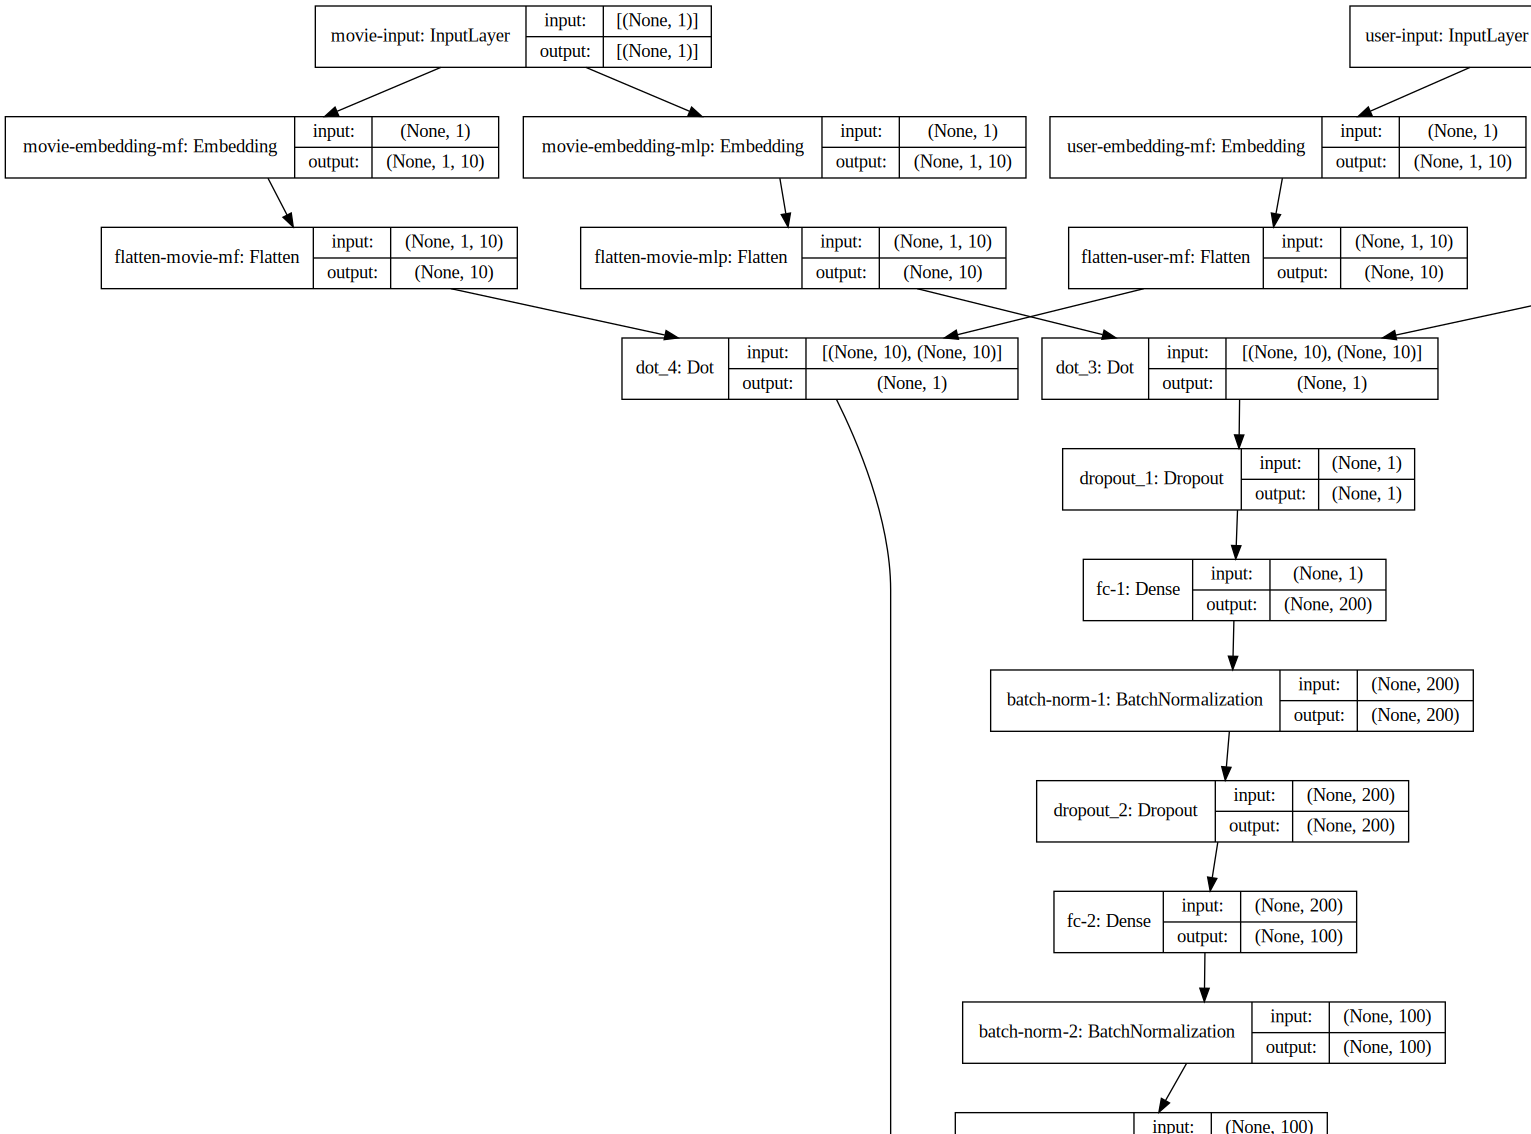

In [69]:
from keras.models import Model, Sequential
from keras.layers import Embedding, Flatten, Input, merge, Dropout, Dense, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
# from keras.utils.visualize_util import model_to_dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

latent_dim = 10

# Define inputs
movie_input = Input(shape=[1],name='movie-input')
user_input = Input(shape=[1], name='user-input')

# MLP Embeddings
movie_embedding_mlp = Embedding(num_movies + 1, latent_dim, name='movie-embedding-mlp')(movie_input)
movie_vec_mlp = Flatten(name='flatten-movie-mlp')(movie_embedding_mlp)

user_embedding_mlp = Embedding(num_users + 1, latent_dim, name='user-embedding-mlp')(user_input)
user_vec_mlp = Flatten(name='flatten-user-mlp')(user_embedding_mlp)

# MF Embeddings
movie_embedding_mf = Embedding(num_movies + 1, latent_dim, name='movie-embedding-mf')(movie_input)
movie_vec_mf = Flatten(name='flatten-movie-mf')(movie_embedding_mf)

user_embedding_mf = Embedding(num_users + 1, latent_dim, name='user-embedding-mf')(user_input)
user_vec_mf = Flatten(name='flatten-user-mf')(user_embedding_mf)



from keras.layers import dot ,Concatenate




# MLP layers
# concat = merge([movie_vec_mlp, user_vec_mlp], mode='concat', name='concat')
concat = dot([movie_vec_mlp, user_vec_mlp], axes=1, normalize=False)
concat_dropout = Dropout(0.2)(concat)
fc_1 = Dense(200, name='fc-1', activation='relu')(concat_dropout)
fc_1_bn = BatchNormalization(name='batch-norm-1')(fc_1)
fc_1_dropout = Dropout(0.2)(fc_1_bn)
fc_2 = Dense(100, name='fc-2', activation='relu')(fc_1_dropout)
fc_2_bn = BatchNormalization(name='batch-norm-2')(fc_2)
fc_2_dropout = Dropout(0.2)(fc_2_bn)

# Prediction from both layers
pred_mlp = Dense(10, name='pred-mlp', activation='relu')(fc_2_dropout)
# pred_mf = merge([movie_vec_mf, user_vec_mf], mode='dot', name='pred-mf')
pred_mf = dot([movie_vec_mf, user_vec_mf], axes=1, normalize=False)
# combine_mlp_mf = merge([pred_mf, pred_mlp], mode='concat', name='combine-mlp-mf')
combine_mlp_mf = Concatenate(axis=1)([pred_mf, pred_mlp])

# Final prediction
result = Dense(1, name='result', activation='relu')(combine_mlp_mf)

model = Model([user_input, movie_input], result)
model.compile(optimizer=Adam(lr=0.01), loss='mean_absolute_error')
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

Epoch 1/40
3472/3472 [==============================] - 110s 31ms/step - loss: 0.9921 - val_loss: 0.9093
Epoch 2/40
3472/3472 [==============================] - 128s 37ms/step - loss: 0.8975 - val_loss: 0.8983
Epoch 3/40
3472/3472 [==============================] - 130s 38ms/step - loss: 0.6816 - val_loss: 0.9416


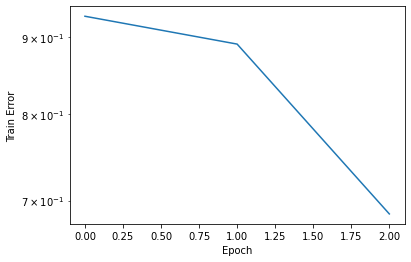

0.9323616700994151

In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
es = EarlyStopping(monitor='val_loss', mode='min')
history = model.fit([train.user_id, train.movie_id], train.rating, epochs=40,validation_split =0.1,callbacks=[es])
pd.Series(history.history['loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")
plt.show()

y_hat = np.round(model.predict([test.user_id, test.movie_id]), decimals=2)
y_true = test.rating
mean_absolute_error(y_true, y_hat)